#### $$Students\ Performance\ Project$$

###### $$Released\ by\ Jakup\ Ymeraj$$

###### $$December\ 2024$$

In [274]:
#import libraries
import numpy as np                                                                                  #type: ignore
import pandas as pd                                                                                 #type: ignore
import matplotlib.pyplot as plt                                                                     #type: ignore
import seaborn as sns                                                                               #type: ignore
import statsmodels.graphics.mosaicplot as smgp                                                      #type: ignore
from statsmodels.graphics.mosaicplot import mosaic                                                  #type: ignore
from scipy.stats import chi2_contingency                                                            #type: ignore
import xgboost as xgb                                                                               #type: ignore
from sklearn.model_selection import train_test_split                                                #type: ignore
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error                       #type: ignore
from sklearn.model_selection import GridSearchCV                                                    #type: ignore

**Load the dataset**

In [275]:
df = pd.read_excel(r"C:\Users\Perdorues\Downloads\Project_Datasets\Students_Performance_Dataset.xlsx")

print(print(df.describe(include='all')))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

c:\Users\Perdorues\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


**Display the dimension of dataset**

In [276]:
df.shape

(1000, 8)

**Check for missing values**

In [277]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**No missing values in dataset**

**Check for duplicate values**

In [278]:
df.duplicated().sum()

0

**No duplicated values**

**Check the number of unique values in each column**

In [279]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### **Descriptive Analysis**

**Summarize key statistics**

In [280]:
def calculate_statistics(df):
    stats = {
        "math_score_mean": df['math score'].mean(),
        "reading_score_mean": df['reading score'].mean(),
        "writing_score_mean": df['writing score'].mean(),
        
        "math_score_mode": df['math score'].mode()[0],
        "reading_score_mode": df['reading score'].mode()[0],
        "writing_score_mode": df['writing score'].mode()[0],

        
        "math_score_std_dev": df['math score'].std(),
        "reading_score_std_dev": df['reading score'].std(),
        "writing_score_std_dev": df['writing score'].std(),

        
        "math_score_variance": df['math score'].var(),
        "reading_score_variance": df['reading score'].var(),
        "writing_score_variance": df['writing score'].var(),

        
        "math_score_percentiles": df['math score'].quantile([0.00, 0.25, 0.50, 0.75]),
        "reading_score_percentiles": df['reading score'].quantile([0.00, 0.25, 0.50, 0.75]),
        "writing_score_percentiles": df['writing score'].quantile([0.00, 0.25, 0.50, 0.75]),

        
        "math_score_skewness": df['math score'].skew(),
        "reading_score_skewness": df['reading score'].skew(),
        "writing_score_skewness": df['writing score'].skew(),

        
        "math_score_kurtosis": df['math score'].kurtosis(),
        "reading_score_kurtosis": df['reading score'].kurtosis(),
        "writing_score_kurtosis": df['writing score'].kurtosis()

        
    }
    return stats

score_stats = calculate_statistics(df)
print("Mean:", '\n',f"Average math score: {score_stats['math_score_mean']:.2f}")
print(f"Average reading score: {score_stats['reading_score_mean']:.2f}")
print(f"Average writing score: {score_stats['writing_score_mean']:.2f}")

print("Mode:",'\n',f"Mode for math score: {score_stats['math_score_mode']}")
print(f"Mode for reading score: {score_stats['reading_score_mode']}")
print(f"Mode for writing score: {score_stats['writing_score_mode']}")

print("Standard Deviation:",'\n',f"Standard Deviation for math score: {score_stats['math_score_std_dev']:.2f}")
print("A standard deviation of 15.16 suggests that most of the data points fall within 15.16 units of the mean value.")

print(f"Standard Deviation for reading score: {score_stats['reading_score_std_dev']:.2f}")
print("A standard deviation of 14.60 suggests that most of the data points fall within 14.60 units of the mean value.")

print(f"Standard Deviation for writing score: {score_stats['writing_score_std_dev']:.2f}")
print("A standard deviation of 15.20 suggests that most of the data points fall within 15.20 units of the mean value.")

print("Variance:",'\n',f"Variance for math score: {score_stats['math_score_variance']:.2f}")
print("A variance of 229.92 suggests that the data points in dataset tend to deviate from the mean by a significant amount of 229.92.")

print(f"Variance for reading score: {score_stats['reading_score_variance']:.2f}")
print("A variance of 213.17 suggests that the data points in dataset tend to deviate from the mean by a significant amount of 213.17.")

print(f"Variance for writing score: {score_stats['writing_score_variance']:.2f}")
print("A variance of 230.91 suggests that the data points in dataset tend to deviate from the mean by a significant amount of 230.91.")

Mean: 
 Average math score: 66.09
Average reading score: 69.17
Average writing score: 68.05
Mode: 
 Mode for math score: 65
Mode for reading score: 72
Mode for writing score: 74
Standard Deviation: 
 Standard Deviation for math score: 15.16
A standard deviation of 15.16 suggests that most of the data points fall within 15.16 units of the mean value.
Standard Deviation for reading score: 14.60
A standard deviation of 14.60 suggests that most of the data points fall within 14.60 units of the mean value.
Standard Deviation for writing score: 15.20
A standard deviation of 15.20 suggests that most of the data points fall within 15.20 units of the mean value.
Variance: 
 Variance for math score: 229.92
A variance of 229.92 suggests that the data points in dataset tend to deviate from the mean by a significant amount of 229.92.
Variance for reading score: 213.17
A variance of 213.17 suggests that the data points in dataset tend to deviate from the mean by a significant amount of 213.17.
Varia

In [281]:
#percentiles

print("Percentiles:",'\n',f"Percentiles for math score:\n{score_stats['math_score_percentiles']}")
print(f"Percentiles for reading score:\n{score_stats['reading_score_percentiles']}")
print(f"Percentiles for writing score:\n{score_stats['writing_score_percentiles']}")

Percentiles: 
 Percentiles for math score:
0.00     0.0
0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64
Percentiles for reading score:
0.00    17.0
0.25    59.0
0.50    70.0
0.75    79.0
Name: reading score, dtype: float64
Percentiles for writing score:
0.00    10.00
0.25    57.75
0.50    69.00
0.75    79.00
Name: writing score, dtype: float64


**Skewness values and their interpretation**

In [282]:
print(f"Skewness for math score: {score_stats['math_score_skewness']:.2f}")
if score_stats['math_score_skewness'] < 0:
    print("In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.")
elif score_stats['math_score_skewness'] > 0:
    print("In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.")

print(f"Skewness for reading score: {score_stats['reading_score_skewness']:.2f}")
if score_stats['reading_score_skewness'] < 0:
    print("In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.")
elif score_stats['reading_score_skewness'] > 0:
    print("In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.")

print(f"Skewness for writing score: {score_stats['writing_score_skewness']:.2f}")
if score_stats['writing_score_skewness'] < 0:
    print("In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.")
elif score_stats['writing_score_skewness'] > 0:
    print("In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.")


Skewness for math score: -0.28
In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.
Skewness for reading score: -0.26
In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.
Skewness for writing score: -0.29
In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.


**Kurtosis values and their interpretation**

In [283]:
print(f"Kurtosis for math score: {score_stats['math_score_kurtosis']:.2f}")
if score_stats['math_score_kurtosis'] > 0:
    print("The distribution has a positive kurtosis value, which mean that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.")
elif score_stats['math_score_kurtosis'] < 0:
    print("The distribution has a negative kurtosis value, which mean that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.")

print(f"Kurtosis for reading score: {score_stats['reading_score_kurtosis']:.2f}")
if score_stats['reading_score_kurtosis'] > 0:
    print("The distribution has a positive kurtosis value, which mean that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.")
elif score_stats['reading_score_kurtosis'] < 0:
    print("The distribution has a negative kurtosis value, which mean that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.")

print(f"Kurtosis for writing score: {score_stats['writing_score_kurtosis']:.2f}")
if score_stats['writing_score_kurtosis'] > 0:
    print("The distribution has a positive kurtosis value, which mean that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.")
elif score_stats['writing_score_kurtosis'] < 0:
    print("The distribution has a negative kurtosis value, which mean that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.")

Kurtosis for math score: 0.27
The distribution has a positive kurtosis value, which mean that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.
Kurtosis for reading score: -0.07
The distribution has a negative kurtosis value, which mean that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.
Kurtosis for writing score: -0.03
The distribution has a negative kurtosis value, which mean that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.


**Best students in math:**

In [284]:
full_math_score_students = df[ df['math score'] == 100 ]
percentage_of_full_math_score_students = (len(full_math_score_students))/(len(df)-2)*100


print("Students with full scores in Math:", len(full_math_score_students), "~", percentage_of_full_math_score_students, "%", '\n', full_math_score_students)

Students with full scores in Math: 7 ~ 0.7014028056112225 % 
      gender race/ethnicity parental level of education         lunch  \
149    male        group E          associate's degree  free/reduced   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
623    male        group A                some college      standard   
625    male        group D                some college      standard   
916    male        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   

    test preparation course  math score  reading score  writing score  
149               completed         100            100             93  
451                    none         100             92             97  
458                    none         100            100            100  
623               completed         100             96             86  
6

**Dumbest students in math**

In [285]:
lowest_math_score_students = df[ df['math score'] <= 40 ]
percentage_of_lowest_math_score_students = (len(lowest_math_score_students))/(len(df)-2)*100


print("Students with lowest scores in Math:", len(lowest_math_score_students), "~", percentage_of_lowest_math_score_students, "%", '\n', lowest_math_score_students)

Students with lowest scores in Math: 50 ~ 5.01002004008016 % 
      gender race/ethnicity parental level of education         lunch  \
7      male        group B                some college  free/reduced   
9    female        group B                 high school  free/reduced   
11     male        group D          associate's degree      standard   
17   female        group B            some high school  free/reduced   
33     male        group D                some college      standard   
55   female        group C                 high school  free/reduced   
59   female        group C            some high school  free/reduced   
61     male        group A            some high school  free/reduced   
69   female        group C          associate's degree      standard   
76     male        group E            some high school      standard   
91     male        group C                 high school  free/reduced   
145  female        group C                some college  free/reduced   
2

**Best students in reading**

In [286]:
full_reading_score_students = df[ df['reading score'] == 100 ]
percentage_of_full_reading_score_students = (len(full_reading_score_students))/(len(df)-2)*100


print("Students with full scores in Reading:", len(full_reading_score_students), "~", percentage_of_full_reading_score_students, "%", '\n', full_reading_score_students)

Students with full scores in Reading: 17 ~ 1.7034068136272544 % 
      gender race/ethnicity parental level of education         lunch  \
106  female        group D             master's degree      standard   
114  female        group E           bachelor's degree      standard   
149    male        group E          associate's degree  free/reduced   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
381    male        group C          associate's degree      standard   
458  female        group E           bachelor's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/reduced   
594  female        group C           bachelor's degree      standard   
712  female        group D                some college      standard   
886  female        group E          associate's degree      standard  

**Dumbest students in reading**

In [287]:
lowest_reading_score_students = df[ df['reading score'] <= 40 ]
percentage_of_lowest_reading_score_students = (len(lowest_reading_score_students))/(len(df)-2)*100


print("Students with lowest scores in Reading:", len(lowest_reading_score_students), "~", percentage_of_lowest_reading_score_students, "%", '\n', lowest_reading_score_students)

Students with lowest scores in Reading: 27 ~ 2.7054108216432864 % 
      gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
61     male        group A            some high school  free/reduced   
66     male        group D            some high school  free/reduced   
76     male        group E            some high school      standard   
84     male        group D                 high school  free/reduced   
91     male        group C                 high school  free/reduced   
131    male        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
211    male        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
331    male        group C          associate's degree      standard

**Best students in writing**

In [288]:
full_writing_score_students = df[ df['writing score'] == 100 ]
percentage_of_full_reading_score_students = (len(full_writing_score_students))/(len(df)-2)*100

print("Students with full scores in Writing:", len(full_writing_score_students), "~", percentage_of_full_reading_score_students,"%",'\n', full_writing_score_students)

Students with full scores in Writing: 14 ~ 1.402805611222445 % 
      gender race/ethnicity parental level of education         lunch  \
106  female        group D             master's degree      standard   
114  female        group E           bachelor's degree      standard   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
377  female        group D             master's degree  free/reduced   
403  female        group D                 high school      standard   
458  female        group E           bachelor's degree      standard   
566  female        group E           bachelor's degree  free/reduced   
685  female        group E             master's degree      standard   
903  female        group D           bachelor's degree  free/reduced   
916    male        group E           bachelor's degree      standard   
957  female        group D             master's degree      standard   

**Dumbest students in writing**

In [289]:
lowest_writing_score_students = df[ df['writing score'] <= 40 ]
percentage_of_lowest_writing_score_students = (len(lowest_writing_score_students))/(len(df)-2)*100


print("Students with lowest scores in Writing:", len(lowest_writing_score_students), "~", percentage_of_lowest_writing_score_students, "%", '\n', lowest_writing_score_students)

Students with lowest scores in Writing: 35 ~ 3.5070140280561124 % 
      gender race/ethnicity parental level of education         lunch  \
7      male        group B                some college  free/reduced   
17   female        group B            some high school  free/reduced   
33     male        group D                some college      standard   
59   female        group C            some high school  free/reduced   
61     male        group A            some high school  free/reduced   
66     male        group D            some high school  free/reduced   
75     male        group B          associate's degree  free/reduced   
76     male        group E            some high school      standard   
84     male        group D                 high school  free/reduced   
91     male        group C                 high school  free/reduced   
131    male        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced

**Full-score Students**

In [290]:
#filter for students with full scores
full_score_students = df[(df['math score'] == 100) & 
                        (df['reading score'] == 100) & 
                        (df['writing score'] == 100)]

percentage_of_full_score_students = (len(full_score_students))/(len(df)-2)*100

print("Students with full scores in math, reading and writing:", len(full_score_students), "~", percentage_of_full_score_students, "%", '\n', full_score_students)


Students with full scores in math, reading and writing: 3 ~ 0.30060120240480964 % 
      gender race/ethnicity parental level of education     lunch  \
458  female        group E           bachelor's degree  standard   
916    male        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
458                    none         100            100            100  
916               completed         100            100            100  
962                    none         100            100            100  


**Lowest-score Students**

In [291]:
#filter for students with lowest scores
lowest_score_students = df[(df['math score'] <= 40) & 
                        (df['reading score'] <= 40) & 
                        (df['writing score'] <= 40)]

percentage_of_lowest_score_students = (len(lowest_score_students))/(len(df)-1)*100

print("Students with lowest scores in math, reading and writing:", len(lowest_score_students), "~", percentage_of_lowest_score_students, "%", '\n', lowest_score_students)


Students with lowest scores in math, reading and writing: 18 ~ 1.8018018018018018 % 
      gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
61     male        group A            some high school  free/reduced   
76     male        group E            some high school      standard   
91     male        group C                 high school  free/reduced   
145  female        group C                some college  free/reduced   
211    male        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
338  female        group B            some high school  free/reduced   
363  female        group D            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
555  female        group C                some col

**Contingency table**

In [292]:
def contingency_table(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    chi2, p, dof, expected = chi2_contingency(table)
    return table, chi2, p, dof, expected

print('\nContingency Table 1 (gender vs race/ethnicity):')
table1, chi2_1, p1, dof1, expected1 = contingency_table(df, 'gender', 'race/ethnicity')
print(table1)



Contingency Table 1 (gender vs race/ethnicity):
race/ethnicity    group A    group B    group C    group D    group E
gender                                                               
female           6.949807  20.077220  34.749035  24.903475  13.320463
male            10.995851  17.842324  28.838174  27.593361  14.730290


**The contingency table presents the distribution of gender across different racial/ethnic groups (A, B, C, D, E).**

**For females, the highest representation is in group C (34.75%), followed by group D (24.90%). Males are most represented in group D ( 27.59%), followed closely by group C (28.84%).**

In [293]:
#apply the chi^2 test to the data

chi2, p, dof, expected = chi2_contingency(table1)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

#interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-Square Statistic: 1.8020837730062316
P-value: 0.7721010920273174
Degrees of Freedom: 4
Expected Frequencies:
 [[ 8.97282879 18.95977186 31.79360451 26.24841795 14.02537689]
 [ 8.97282879 18.95977186 31.79360451 26.24841795 14.02537689]]
Fail to reject the null hypothesis: There is no significant association between the variables.


In [294]:
def contingency_table(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    chi2, p, dof, expected = chi2_contingency(table)
    return table, chi2, p, dof, expected

print('\nContingency Table 1 (race/ethnicity vs lunch meal):')
table3, chi2_1, p1, dof1, expected1 = contingency_table(df, 'race/ethnicity', 'parental level of education')
print(table3)


Contingency Table 1 (race/ethnicity vs lunch meal):
parental level of education  associate's degree  bachelor's degree  \
race/ethnicity                                                       
group A                               15.730337          13.483146   
group B                               21.578947          10.526316   
group C                               24.451411          12.539185   
group D                               19.083969          10.687023   
group E                               27.857143          12.857143   

parental level of education  high school  master's degree  some college  \
race/ethnicity                                                            
group A                        20.224719         3.370787     20.224719   
group B                        25.263158         3.157895     19.473684   
group C                        20.062696         5.956113     21.630094   
group D                        16.793893         8.778626     25.572519   
group 

**Key Observations:**

**Associate's Degree:**

**Group E has the highest percentage (27.86%) of students whose parents have an associate's degree.**
**Group B has the lowest percentage (21.58%).**

**Bachelor's Degree:**

**Group A has the highest percentage (13.48%) of students whose parents have a bachelor's degree.**
**Group B has the lowest percentage (10.53%).**

**High School:**

**Group B has the highest percentage (25.26%) of students whose parents have only a high school education.**
**Group D has the lowest percentage (16.79%).**

**Master's Degree:**

**Group D has the highest percentage (8.78%) of students whose parents have a master's degree.**
**Groups A and B have the lowest percentages (3.37% and 3.16%, respectively).**

**Some College:**

**Group D has the highest percentage (25.57%) of students whose parents have attended some college.**
**Group B has the lowest percentage (19.47%).**

**Some High School:**

**Group A has the highest percentage (26.97%) of students whose parents have only some high school education.**
**Group E has the lowest percentage (12.86%).**

**Comparative Analysis:**

**Group A:**

**Shows a relatively balanced distribution across different educational levels, with notable percentages in some high school (26.97%) and associate's degree (15.73%).**

**Group B:**

**Has the highest percentage of parents with only a high school education (25.26%) and the lowest in several categories, indicating a potential trend of lower educational attainment.**

**Group C:**

**Displays a moderate distribution across all educational levels, with no extreme highs or lows.**

**Group D:**

**Has a notable percentage of parents with some college education (25.57%) and master's degrees (8.78%), suggesting a higher educational attainment compared to other groups.**

**Group E:**

**Shows the highest percentage of parents with an associate's degree (27.86%) and a balanced representation in some college (25.00%).**

**Apply the Chi^2 Test to the data**

In [295]:
chi2, p, dof, expected = chi2_contingency(table3)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

#interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-Square Statistic: 18.852267107684106
P-value: 0.5314466618172375
Degrees of Freedom: 20
Expected Frequencies:
 [[21.74036149 12.01856251 19.61175035  5.39554115 22.38020329 18.85358121]
 [21.74036149 12.01856251 19.61175035  5.39554115 22.38020329 18.85358121]
 [21.74036149 12.01856251 19.61175035  5.39554115 22.38020329 18.85358121]
 [21.74036149 12.01856251 19.61175035  5.39554115 22.38020329 18.85358121]
 [21.74036149 12.01856251 19.61175035  5.39554115 22.38020329 18.85358121]]
Fail to reject the null hypothesis: There is no significant association between the variables.


In [296]:
def contingency_table(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    chi2, p, dof, expected = chi2_contingency(table)
    return table, chi2, p, dof, expected

print('\nContingency Table 1 (gender vs test preparation):')
table4, chi2_1, p1, dof1, expected1 = contingency_table(df, 'gender', 'test preparation course')
print(table4)


Contingency Table 1 (gender vs test preparation):
test preparation course  completed       none
gender                                       
female                   35.521236  64.478764
male                     36.099585  63.900415


In [297]:
#apply the chi^2 test to the data

chi2, p, dof, expected = chi2_contingency(table4)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

#interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
 [[35.81041029 64.18958971]
 [35.81041029 64.18958971]]
Fail to reject the null hypothesis: There is no significant association between the variables.


**Key Observations:**

**Females:**

**Completed Test Preparation Course: 35.52%**

**Did Not Complete Test Preparation Course: 64.48%**

**Males:**

**Completed Test Preparation Course: 36.10%**

**Did Not Complete Test Preparation Course: 63.90%**

**Comparative Analysis:**

**Completion Rates:**

**The percentage of females who completed the test preparation course (35.52%) is slightly lower than that of males (36.10%).**

**Both genders have a majority of students who did not complete the test preparation course, with females at 64.48% and males at 63.90%.**

#### **Data Visualization:**
**Key Insights based on data distribution**

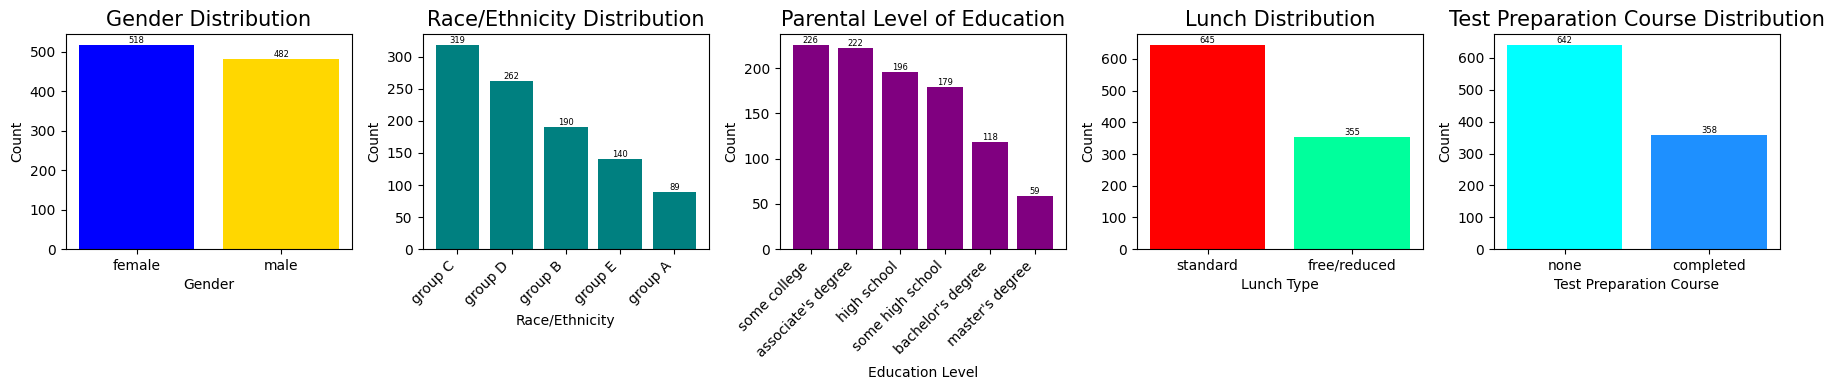

In [298]:
#count values for each category
gender_counts = df['gender'].value_counts()
race_counts = df['race/ethnicity'].value_counts()
education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
test_counts = df['test preparation course'].value_counts()

#create subplots
fig, axs = plt.subplots(1, 5, figsize=(18, 4))

#Gender bar plot
axs[0].bar(gender_counts.index, gender_counts.values, color=['blue', 'gold'])
axs[0].set_title('Gender Distribution', size=15)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Gender')

for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=6)

#Race/Ethnicity bar plot
axs[1].bar(race_counts.index, race_counts.values, color='teal')
axs[1].set_title('Race/Ethnicity Distribution', size=15)
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Race/Ethnicity')
axs[1].set_xticks(range(len(race_counts.index)))  
axs[1].set_xticklabels(race_counts.index, rotation=45, ha='right')

for container in axs[1].containers:
    axs[1].bar_label(container, color='black', size=6)
    
#Parental Level of Education bar plot
axs[2].bar(education_counts.index, education_counts.values, color='purple')
axs[2].set_title('Parental Level of Education', size=15)
axs[2].set_ylabel('Count')
axs[2].set_xlabel('Education Level')
axs[2].set_xticks(range(len(education_counts.index)))  
axs[2].set_xticklabels(education_counts.index, rotation=45, ha='right')

for container in axs[2].containers:
    axs[2].bar_label(container, color='black', size=6)
plt.grid(axis='y')

#lunch bar plot
axs[3].bar(lunch_counts.index, lunch_counts.values, color=['red', '#00FF9C'])
axs[3].set_title('Lunch Distribution', size=15)
axs[3].set_ylabel('Count')
axs[3].set_xlabel('Lunch Type')

for container in axs[3].containers:
    axs[3].bar_label(container, color='black', size=6)

#Test Preparation Course bar plot
axs[4].bar(test_counts.index, test_counts.values, color=['cyan', 'dodgerblue'])
axs[4].set_title('Test Preparation Course Distribution', size=15)
axs[4].set_ylabel('Count')
axs[4].set_xlabel('Test Preparation Course')

for container in axs[4].containers:
    axs[4].bar_label(container, color='black', size=6)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Gender Distribution:**\
   **- Females: 518**\
   **- Males: 482**\
**This indicates a slightly higher number of females than males in the dataset.**

**Race/Ethnicity Distribution:**\
   **- Group C has the highest count (319), followed by Group D (262), Group B (190), Group E (140), and Group A (89).**\
   **Group C is the most common, while Group A is the least.**

**Parental Level of Education:**\
   **- The most frequent education level is "some college" (226) and "associate's degree" (222).**\
   **- "Master's degree" is the least common (59).**

**Lunch Distribution:**\
   **- Standard lunch is more prevalent (645) compared to free/reduced lunch (355).**  

**Test Preparation Course Distribution:**\ 
   **Most students did not complete a test preparation course (642), while a smaller number completed it (358).**

**Distribution in each category; pie chart**

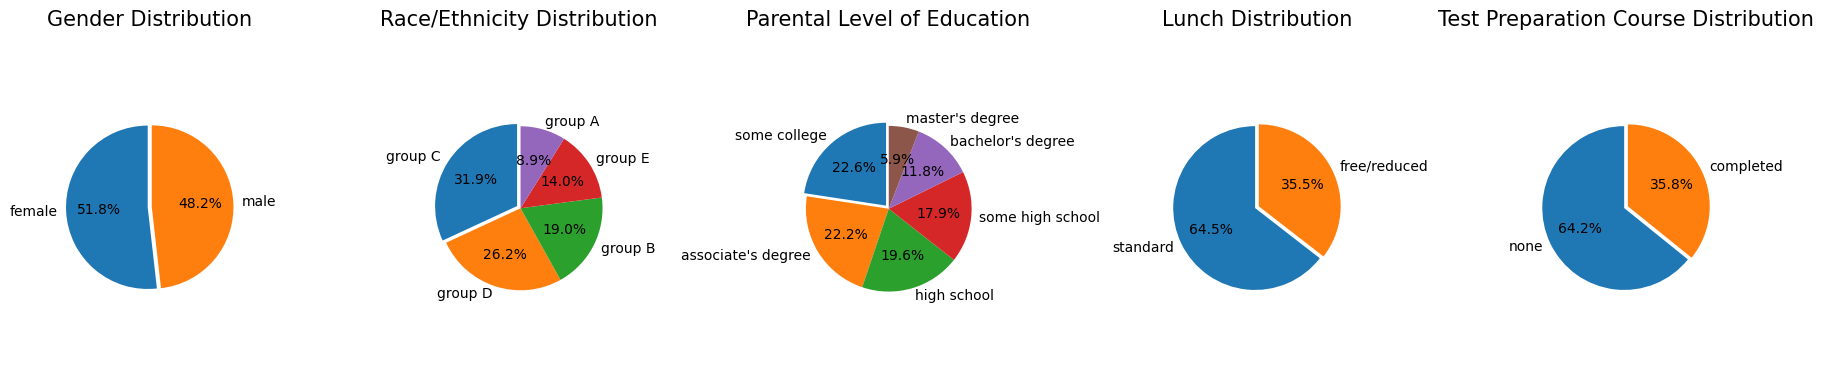

In [299]:
#count values for each category
gender_counts = df['gender'].value_counts()
race_counts = df['race/ethnicity'].value_counts()
education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
test_counts = df['test preparation course'].value_counts()

#create subplots
fig, axs = plt.subplots(1, 5, figsize=(18, 4))

#Gender pie chart
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%2.1f%%', explode=(0.05, 0), shadow=False, startangle=90)
axs[0].set_title('Gender Distribution', size=15)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

#Race/Ethnicity pie chart
axs[1].pie(race_counts, labels=race_counts.index, explode=(0.05, 0, 0, 0, 0), autopct='%2.1f%%', shadow=False, startangle=90)
axs[1].set_title('Race/Ethnicity Distribution', size=15)
axs[1].axis('equal')

#Parental Level of Education pie chart
axs[2].pie(education_counts, labels=education_counts.index, explode=(0.05, 0, 0, 0, 0, 0), autopct='%2.1f%%', shadow=False, startangle=90)
axs[2].set_title('Parental Level of Education', size=15)
axs[2].axis('equal')

#Lunch pie chart
axs[3].pie(lunch_counts, labels=lunch_counts.index, autopct='%2.1f%%', explode=(0.05, 0), shadow=False, startangle=90)
axs[3].set_title('Lunch Distribution', size=15)
axs[3].axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

#Test Preparation Course pie chart
axs[4].pie(test_counts, labels=test_counts.index, autopct='%2.1f%%',  explode=(0.05, 0), shadow=False, startangle=90)
axs[4].set_title('Test Preparation Course Distribution', size=15)
axs[4].axis('equal')

plt.tight_layout()
plt.show()

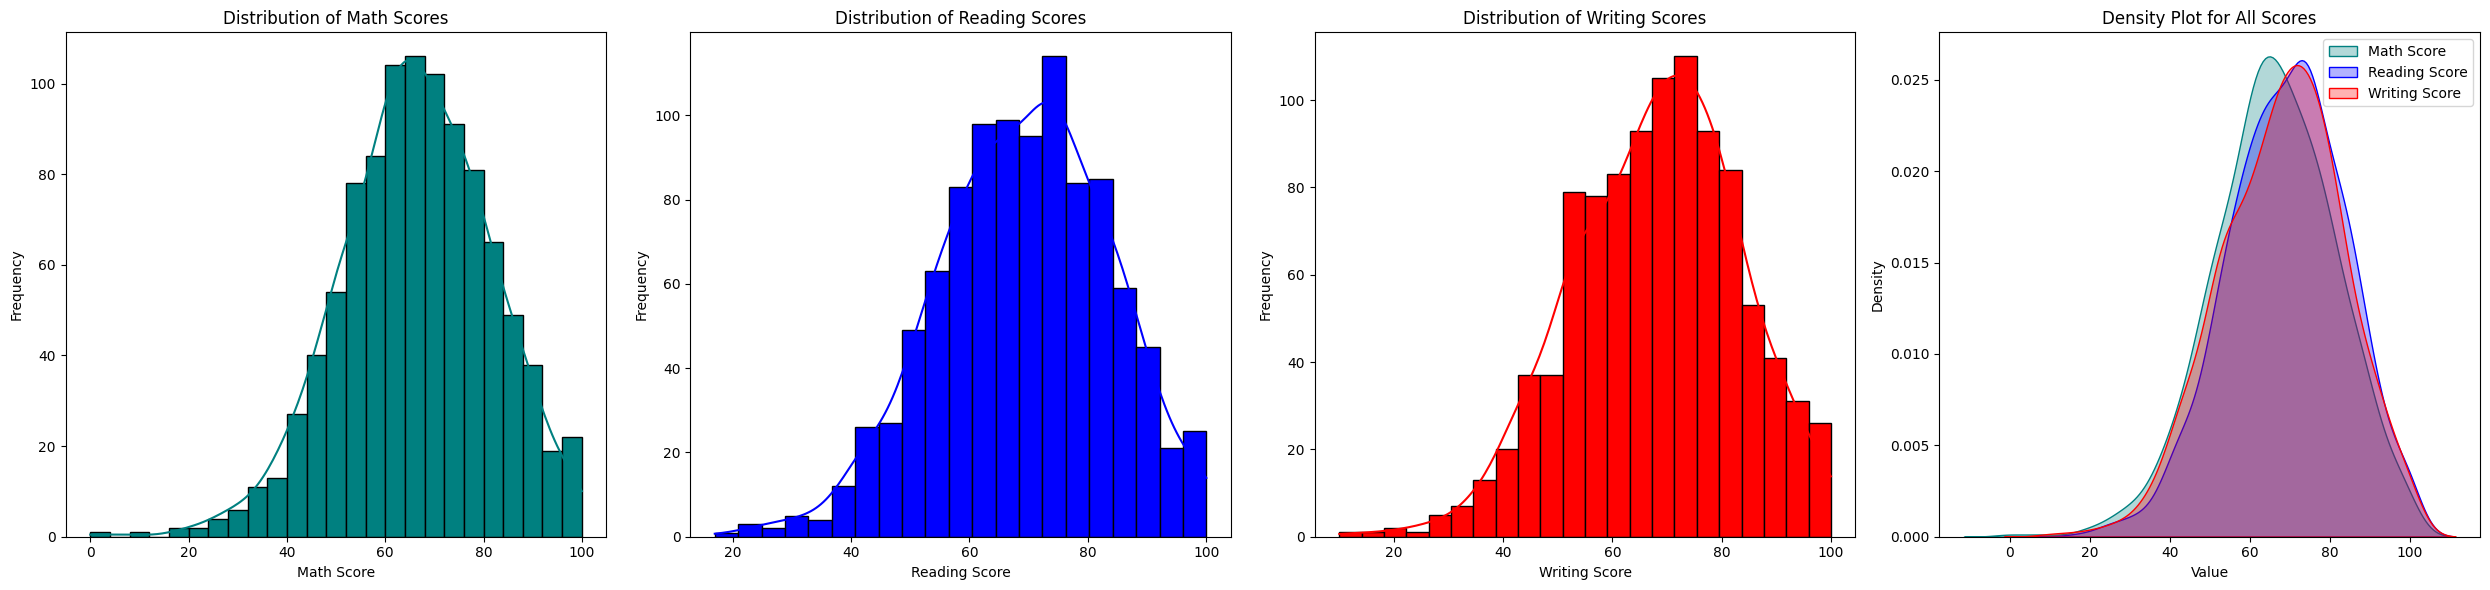

In [300]:
plt.figure(figsize=(25, 6))

#histogram of math scores
plt.subplot(1, 4, 1)
sns.histplot(data=df, x='math score', color='teal', alpha=1, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

#histogram of reading scores
plt.subplot(1, 4, 2)
sns.histplot(data=df, x='reading score', color='blue', alpha=1, kde=True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

#histogram of writing scores
plt.subplot(1, 4, 3)
sns.histplot(data=df, x='writing score', color='red', alpha=1, kde=True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
sns.kdeplot(df['math score'], label="Math Score", color='teal', alpha=0.3, fill=True)
sns.kdeplot(df['reading score'], label="Reading Score", color='blue', alpha=0.3, fill=True)
sns.kdeplot(df['writing score'], label="Writing Score", color='red', alpha=0.3, fill=True)

plt.title("Density Plot for All Scores")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

**Distribution of Math Scores:**

**The histogram shows that math scores are approximately normally distributed, with the peak frequency around 60-70.**\
**Scores range from near 0 to 100, but most students score between 40 and 90.**

**Distribution of Reading Scores:**

**Reading scores also follow an approximate normal distribution, with a peak frequency around 70-80.**\
**The distribution is slightly shifted towards higher scores compared to math, indicating better performance in reading overall.**

**Distribution of Writing Scores:**

**Writing scores are similarly distributed, peaking at 70-80, like reading scores.**\
**The histogram is nearly symmetrical, suggesting a balanced performance across students.**

**Density Plot for All Scores:**

**The density plot overlays the distributions of math, reading, and writing scores.**\
**Reading and writing scores closely overlap, suggesting similar patterns and means.**\
**Math scores have a slightly wider spread and lower mean compared to the other two.**

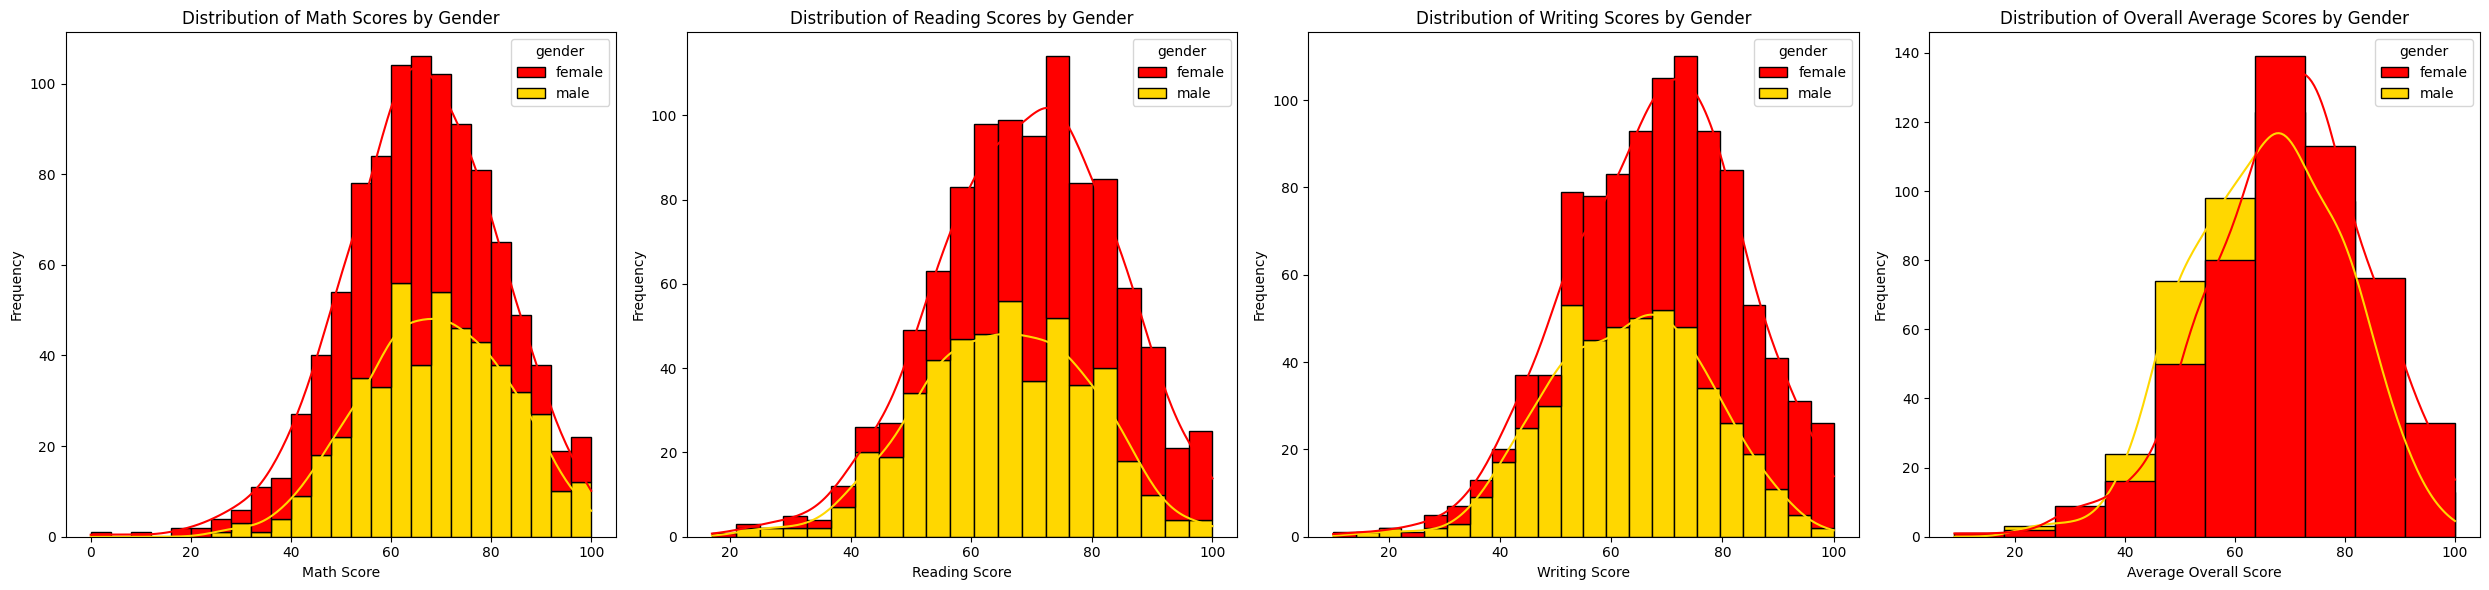

In [301]:
plt.figure(figsize=(25, 6))

#distribution of Math Scores differentiated by Gender
plt.subplot(1, 4, 1)
sns.histplot(data=df, x='math score', hue='gender', multiple='stack', kde=True, palette=['red', 'gold'], alpha=1)
plt.title('Distribution of Math Scores by Gender')
plt.xlabel('Math Score')
plt.ylabel('Frequency')


#distribution of Reading Scores differentiated by Gender
plt.subplot(1, 4, 2)
sns.histplot(data=df, x='reading score', hue='gender', multiple='stack', kde=True, palette=['red', 'gold'], alpha=1)
plt.title('Distribution of Reading Scores by Gender')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')


#distribution of Writing Scores differentiated by Gender
plt.subplot(1, 4, 3)
sns.histplot(data=df, x='writing score', hue='gender', multiple='stack', kde=True, palette=['red', 'gold'], alpha=1)
plt.title('Distribution of Writing Scores by Gender')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')


#calculate the overall average score and compare males vs females
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

#plot the distribution of the average score by gender
plt.subplot(1, 4, 4)
sns.histplot(data=df, x='average score', hue='gender', bins=10, kde=True, palette=['red', 'gold'], alpha=1)
plt.title('Distribution of Overall Average Scores by Gender')
plt.xlabel('Average Overall Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretation:**

**Distribution of Math Scores by Gender:**\
**- Males (yellow) tend to have slightly higher math scores compared to females (red), as indicated by the peak of the male distribution shifting rightward.**\
**- However, both distributions follow a similar normal shape, with most scores concentrated between 40 and 90.**

**Distribution of Reading Scores by Gender:**\
   **- Females generally outperform males in reading, with their peak (red) further to the right compared to males (yellow).**\
   **- The distribution of female scores is also taller at higher values, indicating better performance on average.**

**Distribution of Writing Scores by Gender:**\ 
   **- Similar to reading, females outperform males in writing.**\ 
   **- The female distribution peak is clearly higher, while males show a broader spread toward lower scores.**

**Distribution of Overall Average Scores by Gender:**\
   **- The overall performance reflects the subject-wise trends, with females having higher average scores than males.**\
   **- The female distribution is more concentrated at higher scores, while the male distribution is broader and shifted slightly lower.**

**General Insights:**\
**- Males perform slightly better in math, while females excel in reading and writing.**\
**- Overall, females have better average scores across all subjects.**

##### **Calculate average overall scores (math, reading and writing scores)**

In [302]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3

**Create a subplot with three histograms: first histogram will show the distribution of average scores differentiated by Race/ethnicity in general, 2nd plot will show the distribution of average scores differentiated by Race/ethnicity -> Females, and 3rd plot will show the distribution of average scores differentiated by Race/ethnicity -> Males.**

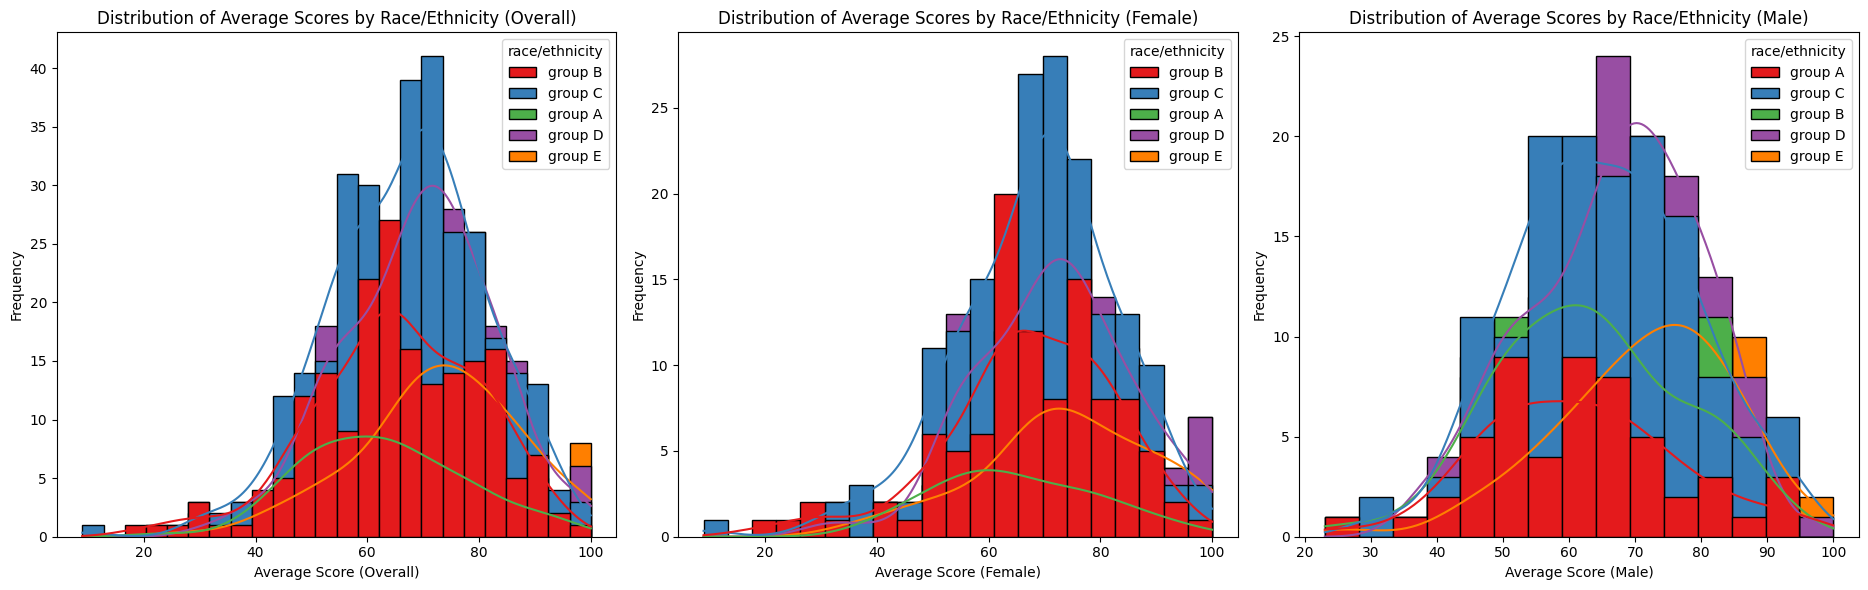

In [303]:

#calculate average scores based on Race/Ethnicity and Gender
average = df.groupby(['race/ethnicity', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'}).reset_index()

#create a subplot with three histograms
plt.figure(figsize=(25, 6))

#plot the first histogram, differentiated by Race/Ethnicity type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Race/Ethnicity (Overall)')
plt.xlabel('Average Score (Overall)')
plt.ylabel('Frequency')

#plot the second histogram, differentiated by Race/Ethnicity type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Race/Ethnicity (Female)')
plt.xlabel('Average Score (Female)')
plt.ylabel('Frequency')

#plot the third histogram, differentiated by Race/Ethnicity type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Race/Ethnicity (Male)')
plt.xlabel('Average Score (Male)')
plt.ylabel('Frequency')

plt.tight_layout()

**We note that Group C is the group that has a significant difference in the average score values of the five ethnical groups, in two first cases. In the third case Group D tends to be in priority of average score values.**

**Now let's create a subplot with three histograms: first histogram will show the distribution of average scores differentiated by Parental Level of Education in general, 2nd plot will show the distribution of average scores differentiated by Parental Level of Education -> Females, and 3rd plot will show the distribution of average scores differentiated by Parental Level of Education -> Males.**

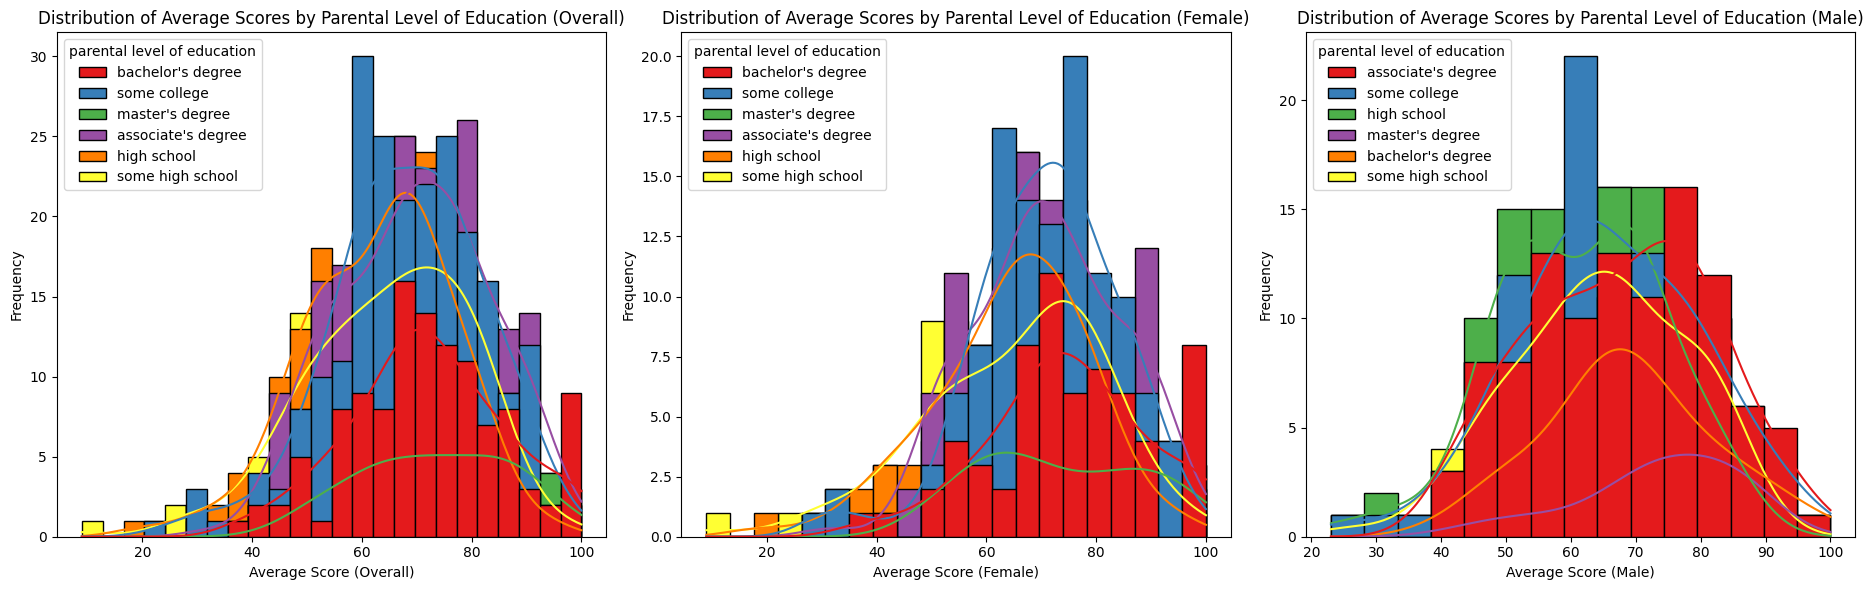

In [304]:
#calculate average scores based on Parental Level of Education and Gender
average = df.groupby(['parental level of education', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

#create a subplot with three histograms side by side
plt.figure(figsize=(25, 6))

#plot the first histogram, differentiated by Parental Level of Education type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Parental Level of Education (Overall)')
plt.xlabel('Average Score (Overall)')
plt.ylabel('Frequency')

#plot the second histogram, differentiated by Parental Level of Education type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Parental Level of Education (Female)')
plt.xlabel('Average Score (Female)')
plt.ylabel('Frequency')

#plot the third histogram, differentiated by Parental Level of Education type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Parental Level of Education (Male)')
plt.xlabel('Average Score (Male)')
plt.ylabel('Frequency')

plt.tight_layout()

**In all three cases, we note that students whose parents have some college education tend to have higher grade point averages compared to other students, followed by those students whose parents have completed high school, master degree or an associate's degree.**

**Let's create a subplot with three histograms: first histogram will show the distribution of average scores differentiated by Lunch Meal in general, 2nd plot will show the distribution of average scores differentiated by Lunch -> Females, and 3rd plot will show the distribution of average scores differentiated by Lunch -> Males.**

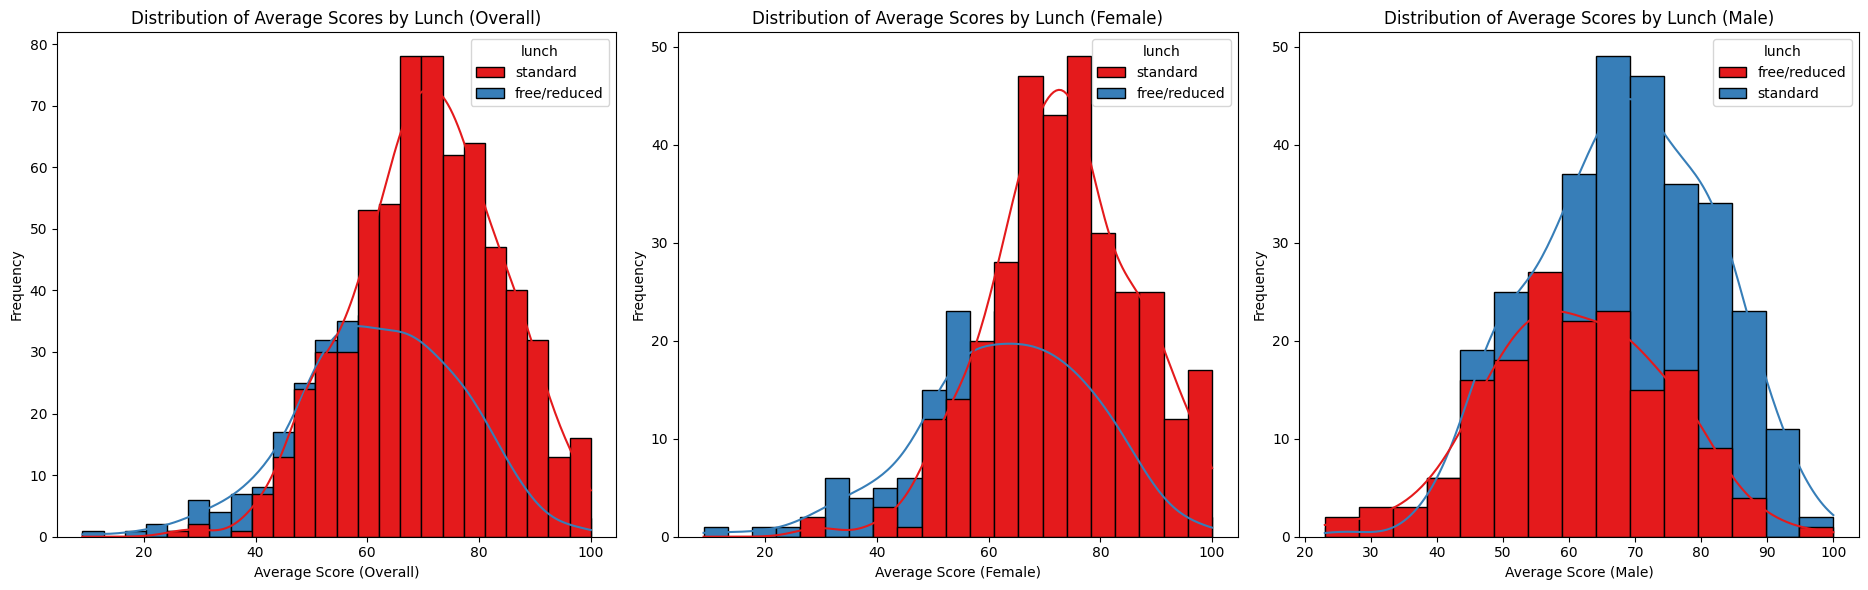

In [305]:
#calculate average scores based on lunch and Gender
average = df.groupby(['lunch', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

#create a subplot with three histograms side by side
plt.figure(figsize=(25, 6))

#plot the first histogram, differentiated by lunch type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Lunch (Overall)')
plt.xlabel('Average Score (Overall)')
plt.ylabel('Frequency')

#plot the second histogram, differentiated by lunch type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Lunch (Female)')
plt.xlabel('Average Score (Female)')
plt.ylabel('Frequency')

#plot the third histogram, differentiated by lunch type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Lunch (Male)')
plt.xlabel('Average Score (Male)')
plt.ylabel('Frequency')

plt.tight_layout()

**In three cases we notice that students who eat a standard lunch meal tend to have a higher average score than students who eat a free/reduced lunch meal.**

**Let's create a subplot with three histograms: first histogram will show the distribution of average scores differentiated by Test Preparation Course in general, 2nd plot will show the distribution of average scores differentiated by Test Preparation Course -> Females, and 3rd plot will show the distribution of average scores differentiated by Test Preparation Course -> Males.**

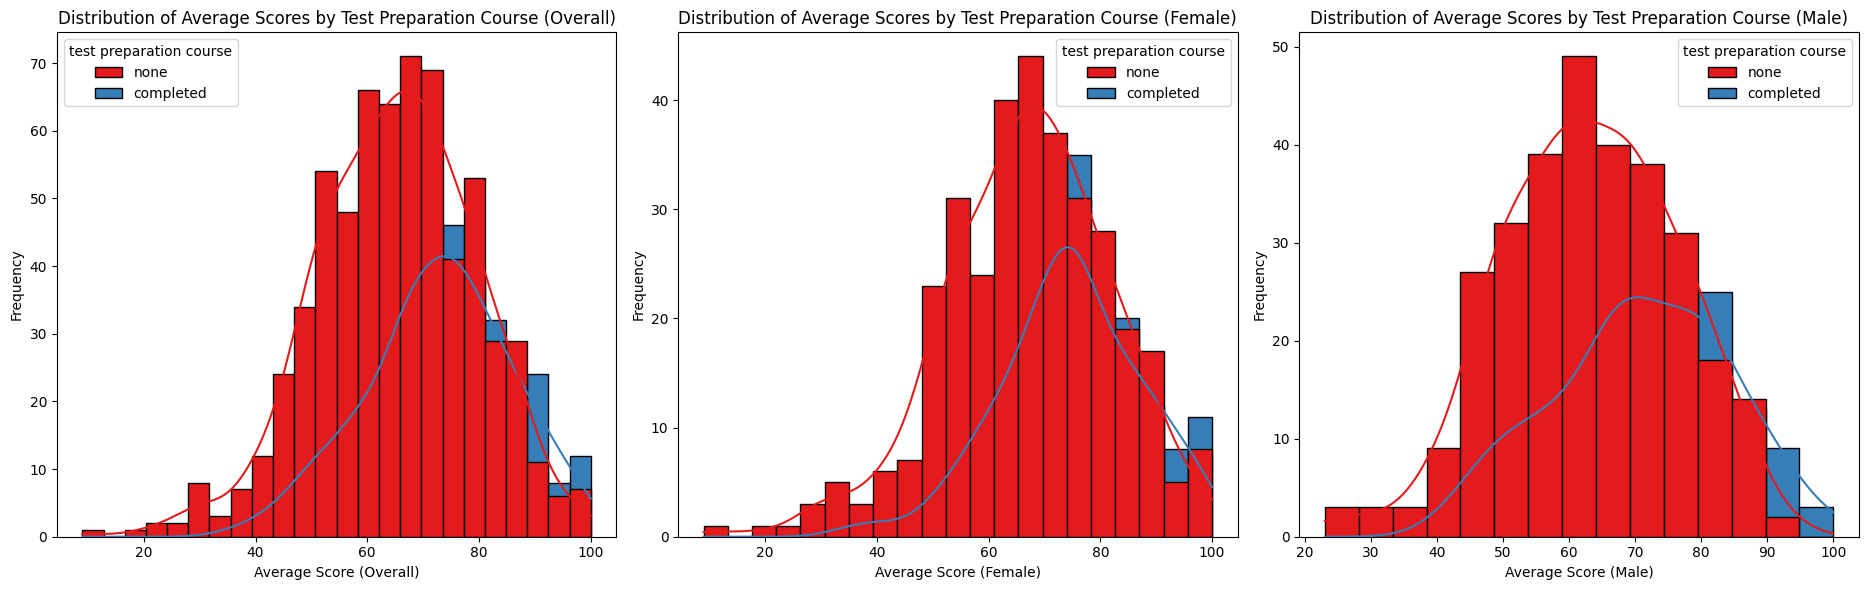

In [306]:
#calculate average scores based on Test Preparation Course and Gender
average = df.groupby(['test preparation course', 'gender']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

#create a subplot with three histograms side by side
plt.figure(figsize=(25, 6))

#plot the first histogram with KDE, differentiated by Test Preparation Course type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Test Preparation Course (Overall)')
plt.xlabel('Average Score (Overall)')
plt.ylabel('Frequency')

#plot the second histogram, differentiated by Test Preparation Course type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='test preparation course', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Test Preparation Course (Female)')
plt.xlabel('Average Score (Female)')
plt.ylabel('Frequency')

#plot the third histogram, differentiated by Test Preparation Course type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='test preparation course', palette='Set1', alpha=1)
plt.title('Distribution of Average Scores by Test Preparation Course (Male)')
plt.xlabel('Average Score (Male)')
plt.ylabel('Frequency')

plt.tight_layout()

**Again, we note that completing a test preparation course has no impact on high average scores. Students who have not taken any preparatory tests result in higher average scores than those who have taken a test, whether male or female students.**

**Now let's compare ethnic groups, without differentiating them into females and males, but in general, to see the trend of students in terms of average scores.**

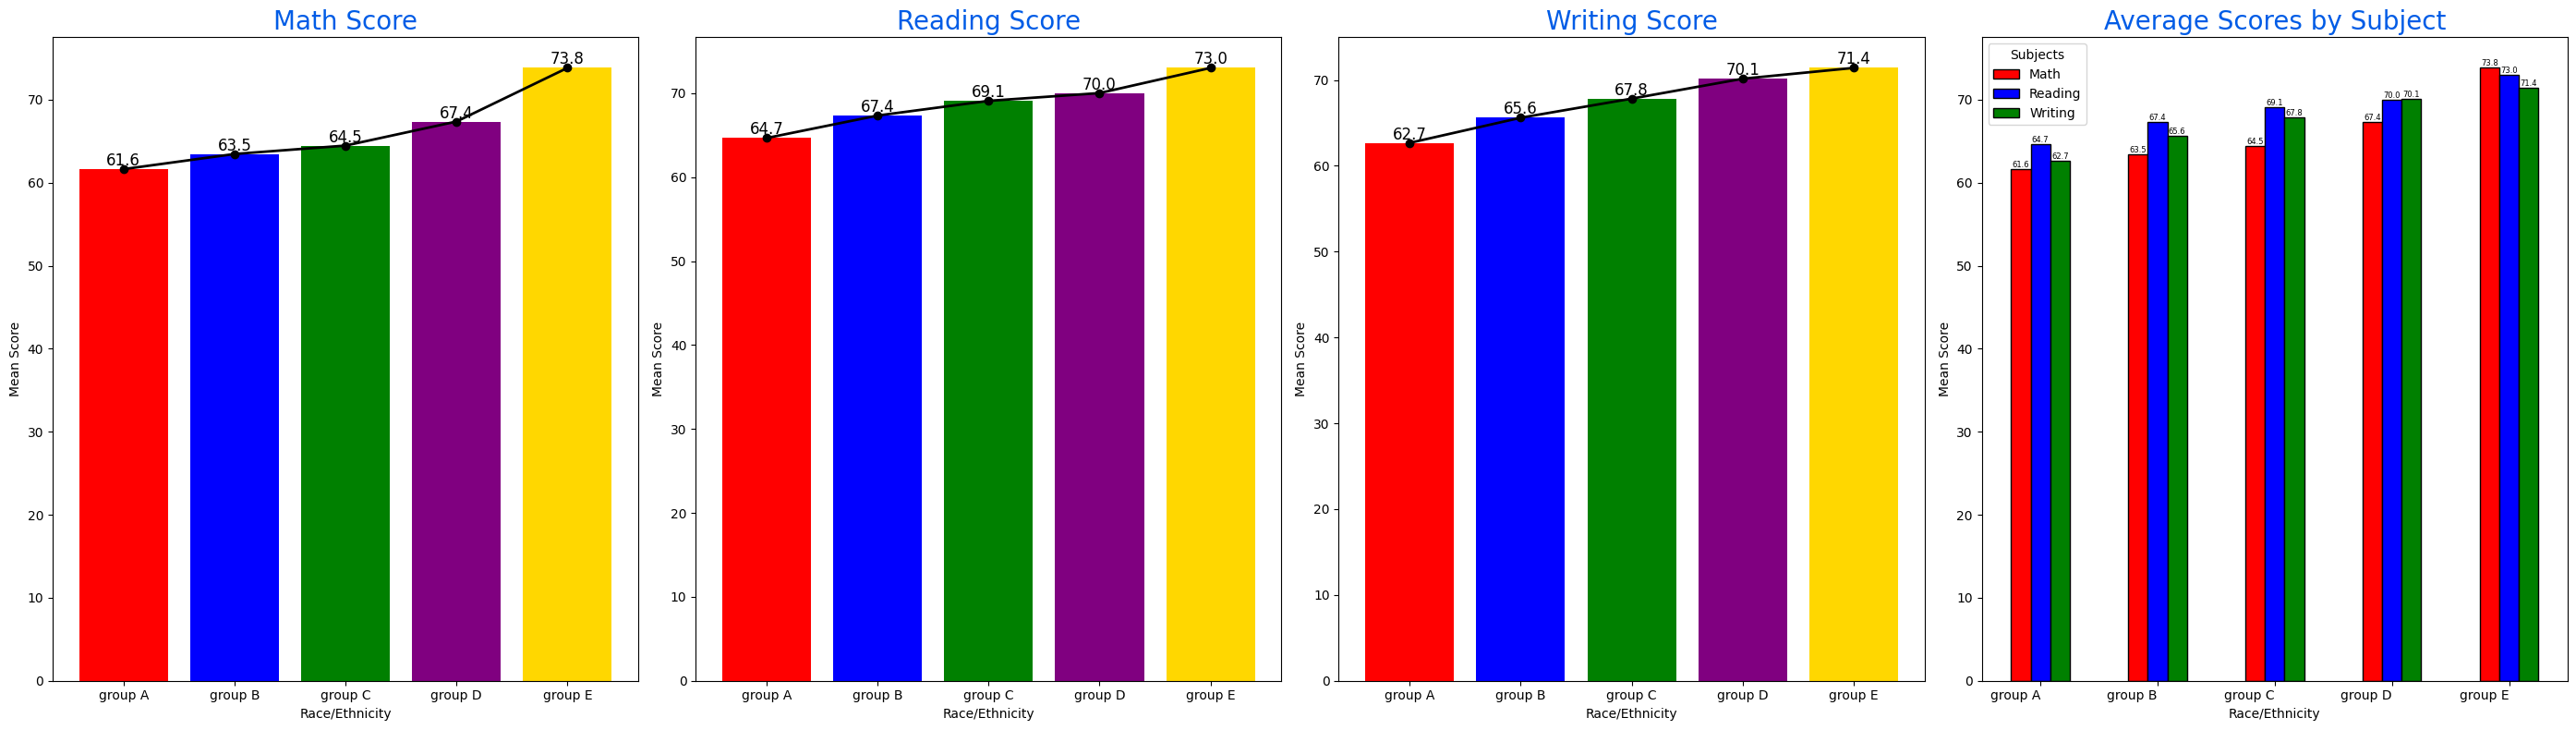

In [307]:
#group the data by 'Race/Ethnicity'
Group_data2 = df.groupby('race/ethnicity')

#calculate mean scores for each category
mean_math_scores = Group_data2['math score'].mean()
mean_reading_scores = Group_data2['reading score'].mean()
mean_writing_scores = Group_data2['writing score'].mean()

#create a DataFrame for the average scores
mean_scores_df = pd.DataFrame({
    'Math': mean_math_scores,
    'Reading': mean_reading_scores,
    'Writing': mean_writing_scores
})

#define custom color palettes
math_palette = ['red', 'blue', 'green', 'purple', 'gold']
reading_palette = ['red', 'blue', 'green', 'purple', 'gold']
writing_palette = ['red', 'blue', 'green', 'purple', 'gold']

#create a subplot with four bar plots side by side
f, ax = plt.subplots(1, 4, figsize=(28, 8))

#bar plot for mean Math scores on the left
bars_math = ax[0].bar(mean_math_scores.index, mean_math_scores.values, color=math_palette)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Mean Score')
ax[0].set_xlabel('Race/Ethnicity')

#draw a line over the bars for Math scores
ax[0].plot(mean_math_scores.index, mean_math_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Math scores
for bar in bars_math:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Reading scores in the second position
bars_reading = ax[1].bar(mean_reading_scores.index, mean_reading_scores.values, color=reading_palette)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Race/Ethnicity')

#draw a line over the bars for Reading scores
ax[1].plot(mean_reading_scores.index, mean_reading_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Reading scores
for bar in bars_reading:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Writing scores in the third position
bars_writing = ax[2].bar(mean_writing_scores.index, mean_writing_scores.values, color=writing_palette)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Mean Score')
ax[2].set_xlabel('Race/Ethnicity')

#draw a line over the bars for Writing scores
ax[2].plot(mean_writing_scores.index, mean_writing_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Writing scores
for bar in bars_writing:
    ax[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for average scores across all subjects in the fourth position
bars_avg = mean_scores_df.plot(kind='bar', ax=ax[3], color=['red', 'blue', 'green'], edgecolor='black')
ax[3].set_title('Average Scores by Subject', color='#005ce6', size=20)
ax[3].set_ylabel('Mean Score')
ax[3].set_xlabel('Race/Ethnicity')
ax[3].legend(title='Subjects', labels=['Math', 'Reading', 'Writing'])
ax[3].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')


#annotate the bars for average scores
for i, bar in enumerate(bars_avg.patches):
    ax[3].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=6)

plt.tight_layout()
plt.show()

**We note that students belonging to ethnic group E are generally better students than students from other groups, followed by those from ethnic group D.**

**Apply the same test for 'Parental Level of Education'**

C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\2767065657.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\2767065657.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\2767065657.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')


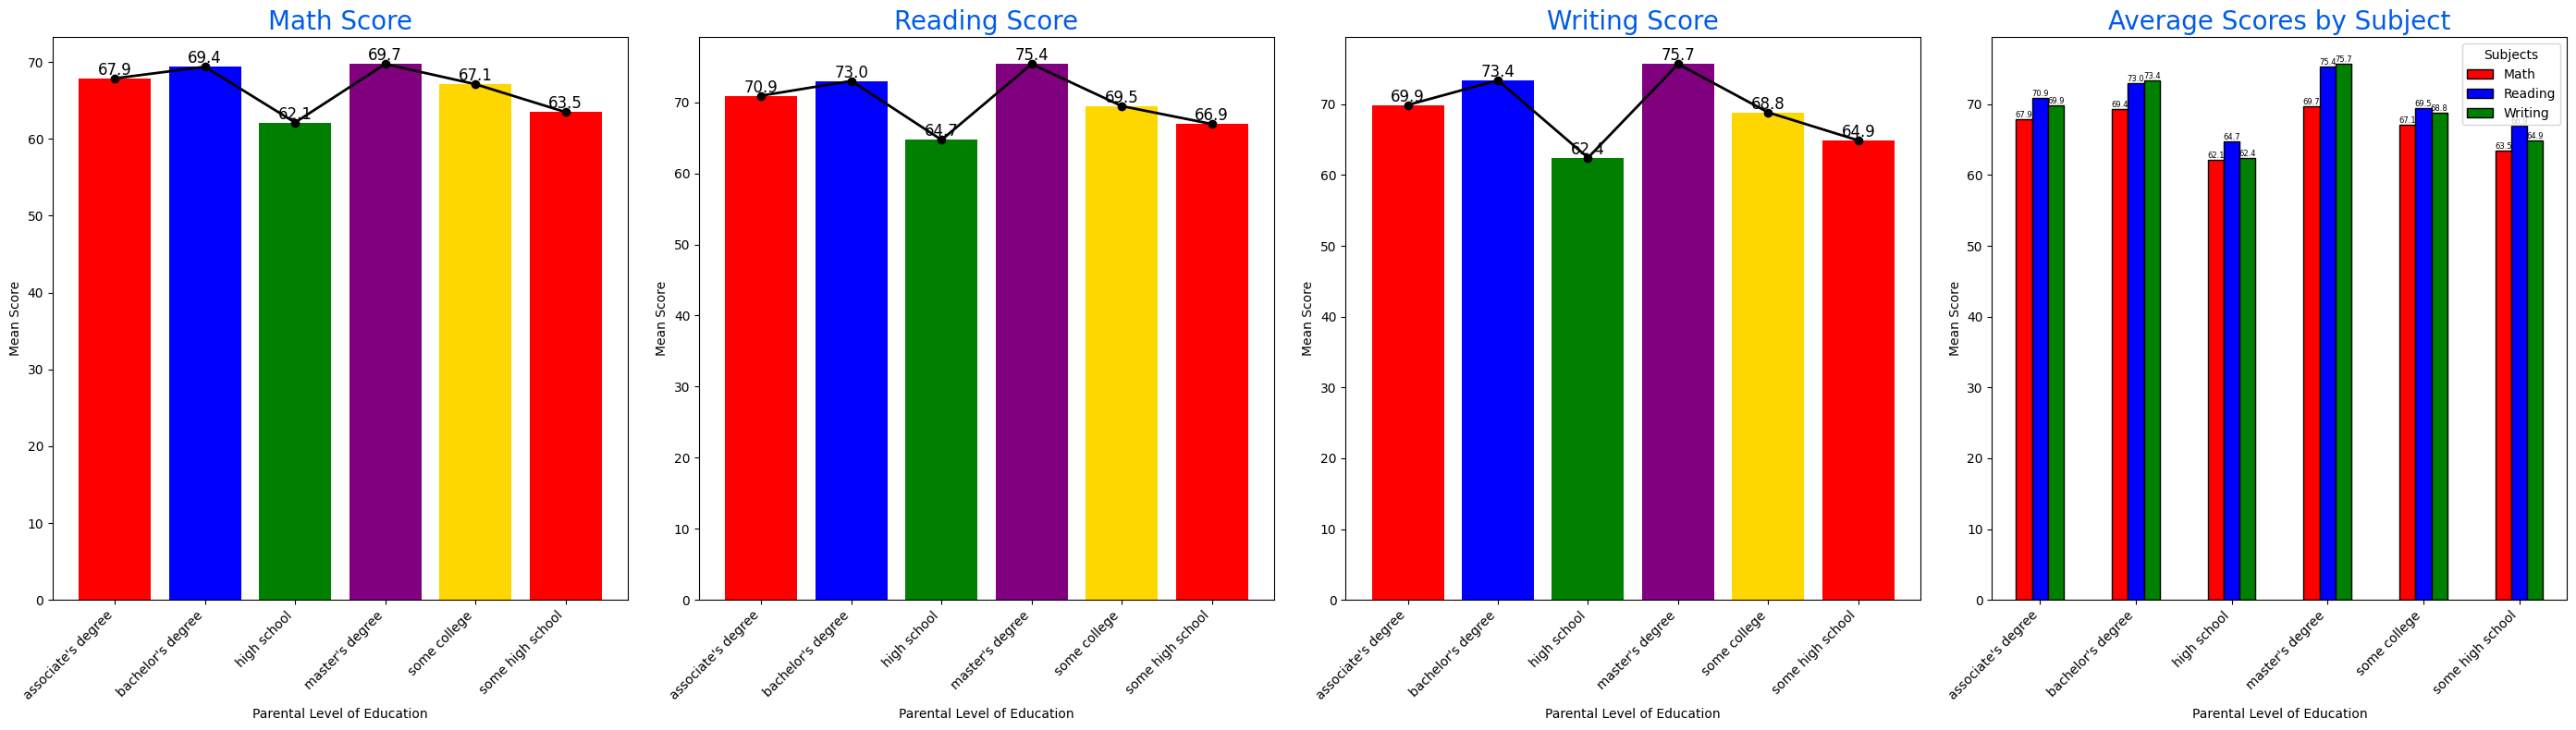

In [308]:
#group the data by 'Parental Level of Education'
Group_data2 = df.groupby('parental level of education')

#calculate mean scores for each category
mean_math_scores = Group_data2['math score'].mean()
mean_reading_scores = Group_data2['reading score'].mean()
mean_writing_scores = Group_data2['writing score'].mean()

#create a DataFrame for the average scores
mean_scores_df = pd.DataFrame({
    'Math': mean_math_scores,
    'Reading': mean_reading_scores,
    'Writing': mean_writing_scores
})

#define custom color palettes
math_palette = ['red', 'blue', 'green', 'purple', 'gold']
reading_palette = ['red', 'blue', 'green', 'purple', 'gold']
writing_palette = ['red', 'blue', 'green', 'purple', 'gold']

#create a subplot with four bar plots side by side
f, ax = plt.subplots(1, 4, figsize=(28, 8))

#bar plot for mean Math scores on the left
bars_math = ax[0].bar(mean_math_scores.index, mean_math_scores.values, color=math_palette)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Mean Score')
ax[0].set_xlabel('Parental Level of Education')
ax[0].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')

#draw a line over the bars for Math scores
ax[0].plot(mean_math_scores.index, mean_math_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Math scores
for bar in bars_math:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Reading scores in the second position
bars_reading = ax[1].bar(mean_reading_scores.index, mean_reading_scores.values, color=reading_palette)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Parental Level of Education')
ax[1].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')

#draw a line over the bars for Reading scores
ax[1].plot(mean_reading_scores.index, mean_reading_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Reading scores
for bar in bars_reading:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Writing scores in the third position
bars_writing = ax[2].bar(mean_writing_scores.index, mean_writing_scores.values, color=writing_palette)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Mean Score')
ax[2].set_xlabel('Parental Level of Education')
ax[2].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')

#draw a line over the bars for Writing scores
ax[2].plot(mean_writing_scores.index, mean_writing_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Writing scores
for bar in bars_writing:
    ax[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for average scores across all subjects in the fourth position
bars_avg = mean_scores_df.plot(kind='bar', ax=ax[3], color=['red', 'blue', 'green'], edgecolor='black')
ax[3].set_title('Average Scores by Subject', color='#005ce6', size=20)
ax[3].set_ylabel('Mean Score')
ax[3].set_xlabel('Parental Level of Education')
ax[3].legend(title='Subjects', labels=['Math', 'Reading', 'Writing'])
ax[3].set_xticklabels(mean_scores_df.index, rotation=45, ha='right')

#annotate the bars for average scores
for i, bar in enumerate(bars_avg.patches):
    ax[3].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=6)

plt.tight_layout()
plt.show()

**As we can see, students whose parents' educational level is a master's degree tend to be better students than others, followed by those with a bachelor's degree parental educational level.**

**Apply the same test for 'Parental Level of Education'**

C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\666711274.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\666711274.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\666711274.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')


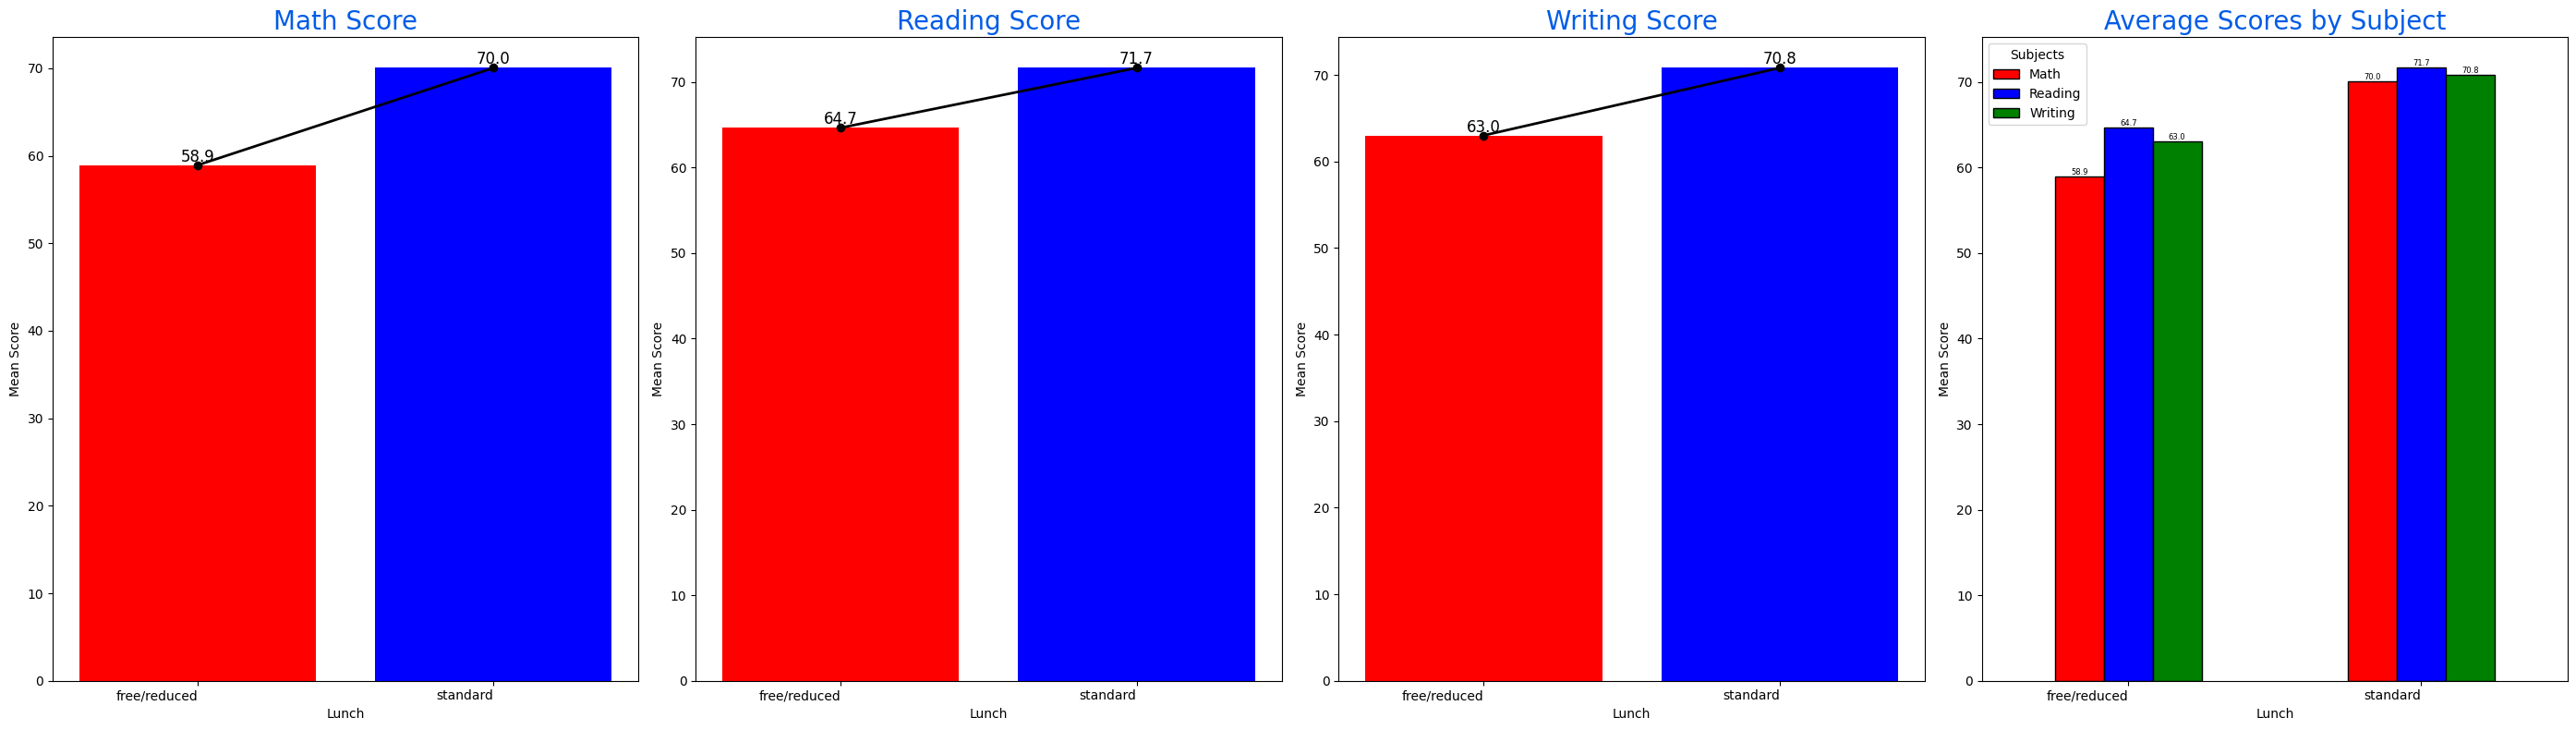

In [309]:
#group the data by 'Lunch'
Group_data2 = df.groupby('lunch')

#calculate mean scores for each category
mean_math_scores = Group_data2['math score'].mean()
mean_reading_scores = Group_data2['reading score'].mean()
mean_writing_scores = Group_data2['writing score'].mean()

#create a DataFrame for the average scores
mean_scores_df = pd.DataFrame({
    'Math': mean_math_scores,
    'Reading': mean_reading_scores,
    'Writing': mean_writing_scores
})

#define custom color palettes
math_palette = ['red', 'blue', 'green', 'purple', 'gold']
reading_palette = ['red', 'blue', 'green', 'purple', 'gold']
writing_palette = ['red', 'blue', 'green', 'purple', 'gold']

#create a subplot with four bar plots side by side
f, ax = plt.subplots(1, 4, figsize=(28, 8))

#bar plot for mean Math scores on the left
bars_math = ax[0].bar(mean_math_scores.index, mean_math_scores.values, color=math_palette)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Mean Score')
ax[0].set_xlabel('Lunch')
ax[0].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Math scores
ax[0].plot(mean_math_scores.index, mean_math_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Math scores
for bar in bars_math:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Reading scores in the second position
bars_reading = ax[1].bar(mean_reading_scores.index, mean_reading_scores.values, color=reading_palette)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Lunch')
ax[1].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Reading scores
ax[1].plot(mean_reading_scores.index, mean_reading_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Reading scores
for bar in bars_reading:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Writing scores in the third position
bars_writing = ax[2].bar(mean_writing_scores.index, mean_writing_scores.values, color=writing_palette)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Mean Score')
ax[2].set_xlabel('Lunch')
ax[2].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Writing scores
ax[2].plot(mean_writing_scores.index, mean_writing_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Writing scores
for bar in bars_writing:
    ax[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for average scores across all subjects in the fourth position
bars_avg = mean_scores_df.plot(kind='bar', ax=ax[3], color=['red', 'blue', 'green'], edgecolor='black')
ax[3].set_title('Average Scores by Subject', color='#005ce6', size=20)
ax[3].set_ylabel('Mean Score')
ax[3].set_xlabel('Lunch')
ax[3].legend(title='Subjects', labels=['Math', 'Reading', 'Writing'])
ax[3].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#annotate the bars for average scores
for i, bar in enumerate(bars_avg.patches):
    ax[3].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=6)

plt.tight_layout()
plt.show()

**Key insights: students who eat a standard lunch meal are more likely to have better performance compared to other students.**

**Apply the same test for 'Test Preparation Course':**

C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\495883794.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\495883794.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')
C:\Users\Perdorues\AppData\Local\Temp\ipykernel_3936\495883794.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')


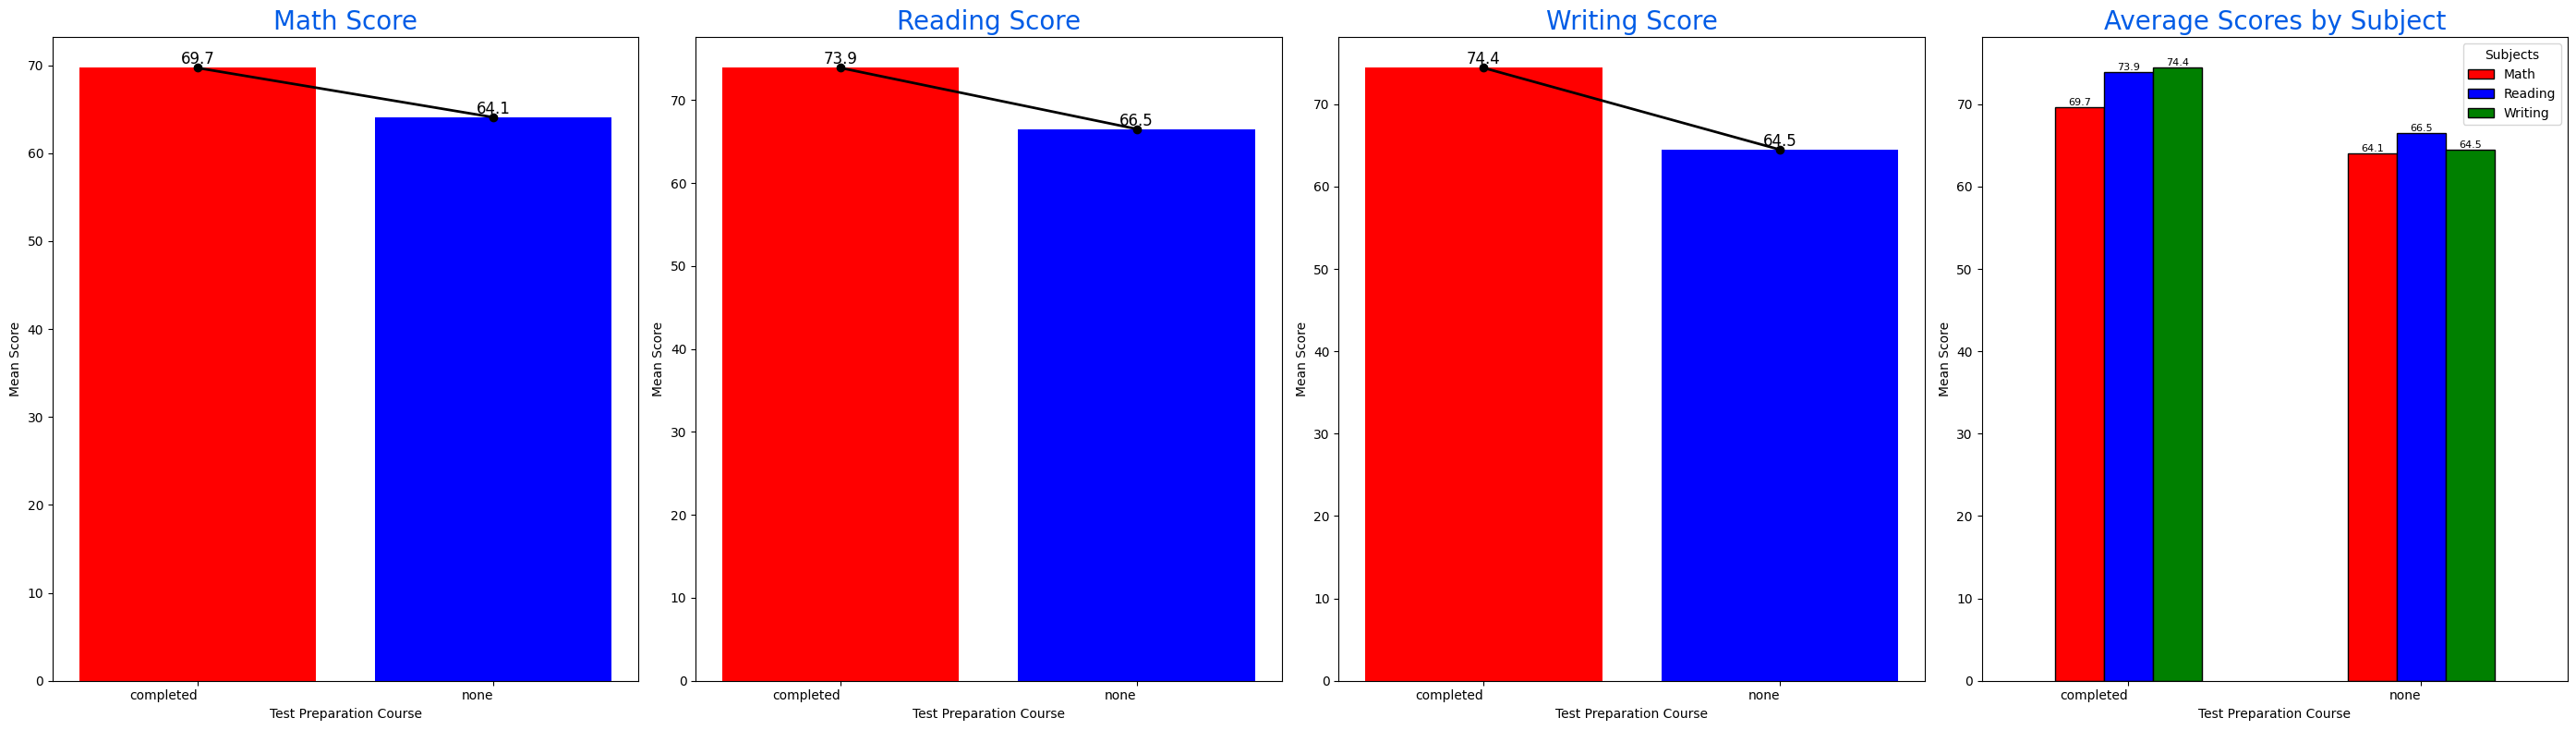

In [310]:
#group the data by 'Test Preparation Course'
Group_data2 = df.groupby('test preparation course')

#calculate mean scores for each category
mean_math_scores = Group_data2['math score'].mean()
mean_reading_scores = Group_data2['reading score'].mean()
mean_writing_scores = Group_data2['writing score'].mean()

#create a DataFrame for the average scores
mean_scores_df = pd.DataFrame({
    'Math': mean_math_scores,
    'Reading': mean_reading_scores,
    'Writing': mean_writing_scores
})

#define custom color palettes
math_palette = ['red', 'blue', 'green', 'purple', 'gold']
reading_palette = ['red', 'blue', 'green', 'purple', 'gold']
writing_palette = ['red', 'blue', 'green', 'purple', 'gold']

#create a subplot with four bar plots side by side
f, ax = plt.subplots(1, 4, figsize=(28, 8))

#bar plot for mean Math scores on the left
bars_math = ax[0].bar(mean_math_scores.index, mean_math_scores.values, color=math_palette)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Mean Score')
ax[0].set_xlabel('Test Preparation Course')
ax[0].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Math scores
ax[0].plot(mean_math_scores.index, mean_math_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Math scores
for bar in bars_math:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Reading scores in the second position
bars_reading = ax[1].bar(mean_reading_scores.index, mean_reading_scores.values, color=reading_palette)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Mean Score')
ax[1].set_xlabel('Test Preparation Course')
ax[1].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Reading scores
ax[1].plot(mean_reading_scores.index, mean_reading_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Reading scores
for bar in bars_reading:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for mean Writing scores in the third position
bars_writing = ax[2].bar(mean_writing_scores.index, mean_writing_scores.values, color=writing_palette)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Mean Score')
ax[2].set_xlabel('Test Preparation Course')
ax[2].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#draw a line over the bars for Writing scores
ax[2].plot(mean_writing_scores.index, mean_writing_scores.values, color='black', marker='o', linewidth=2)

#annotate the bars for Writing scores
for bar in bars_writing:
    ax[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=12)

#bar plot for average scores across all subjects in the fourth position
bars_avg = mean_scores_df.plot(kind='bar', ax=ax[3], color=['red', 'blue', 'green'], edgecolor='black')
ax[3].set_title('Average Scores by Subject', color='#005ce6', size=20)
ax[3].set_ylabel('Mean Score')
ax[3].set_xlabel('Test Preparation Course')
ax[3].legend(title='Subjects', labels=['Math', 'Reading', 'Writing'])
ax[3].set_xticklabels(mean_scores_df.index, rotation=0, ha='right')

#annotate the bars for average scores
for i, bar in enumerate(bars_avg.patches):
    ax[3].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', 
                ha='center', va='bottom', color='black', size=8)

plt.tight_layout()
plt.show()

**We note that students who have completed a test preparation course are more likely to have better results and performance than other students who has not completed a test preparation course.**

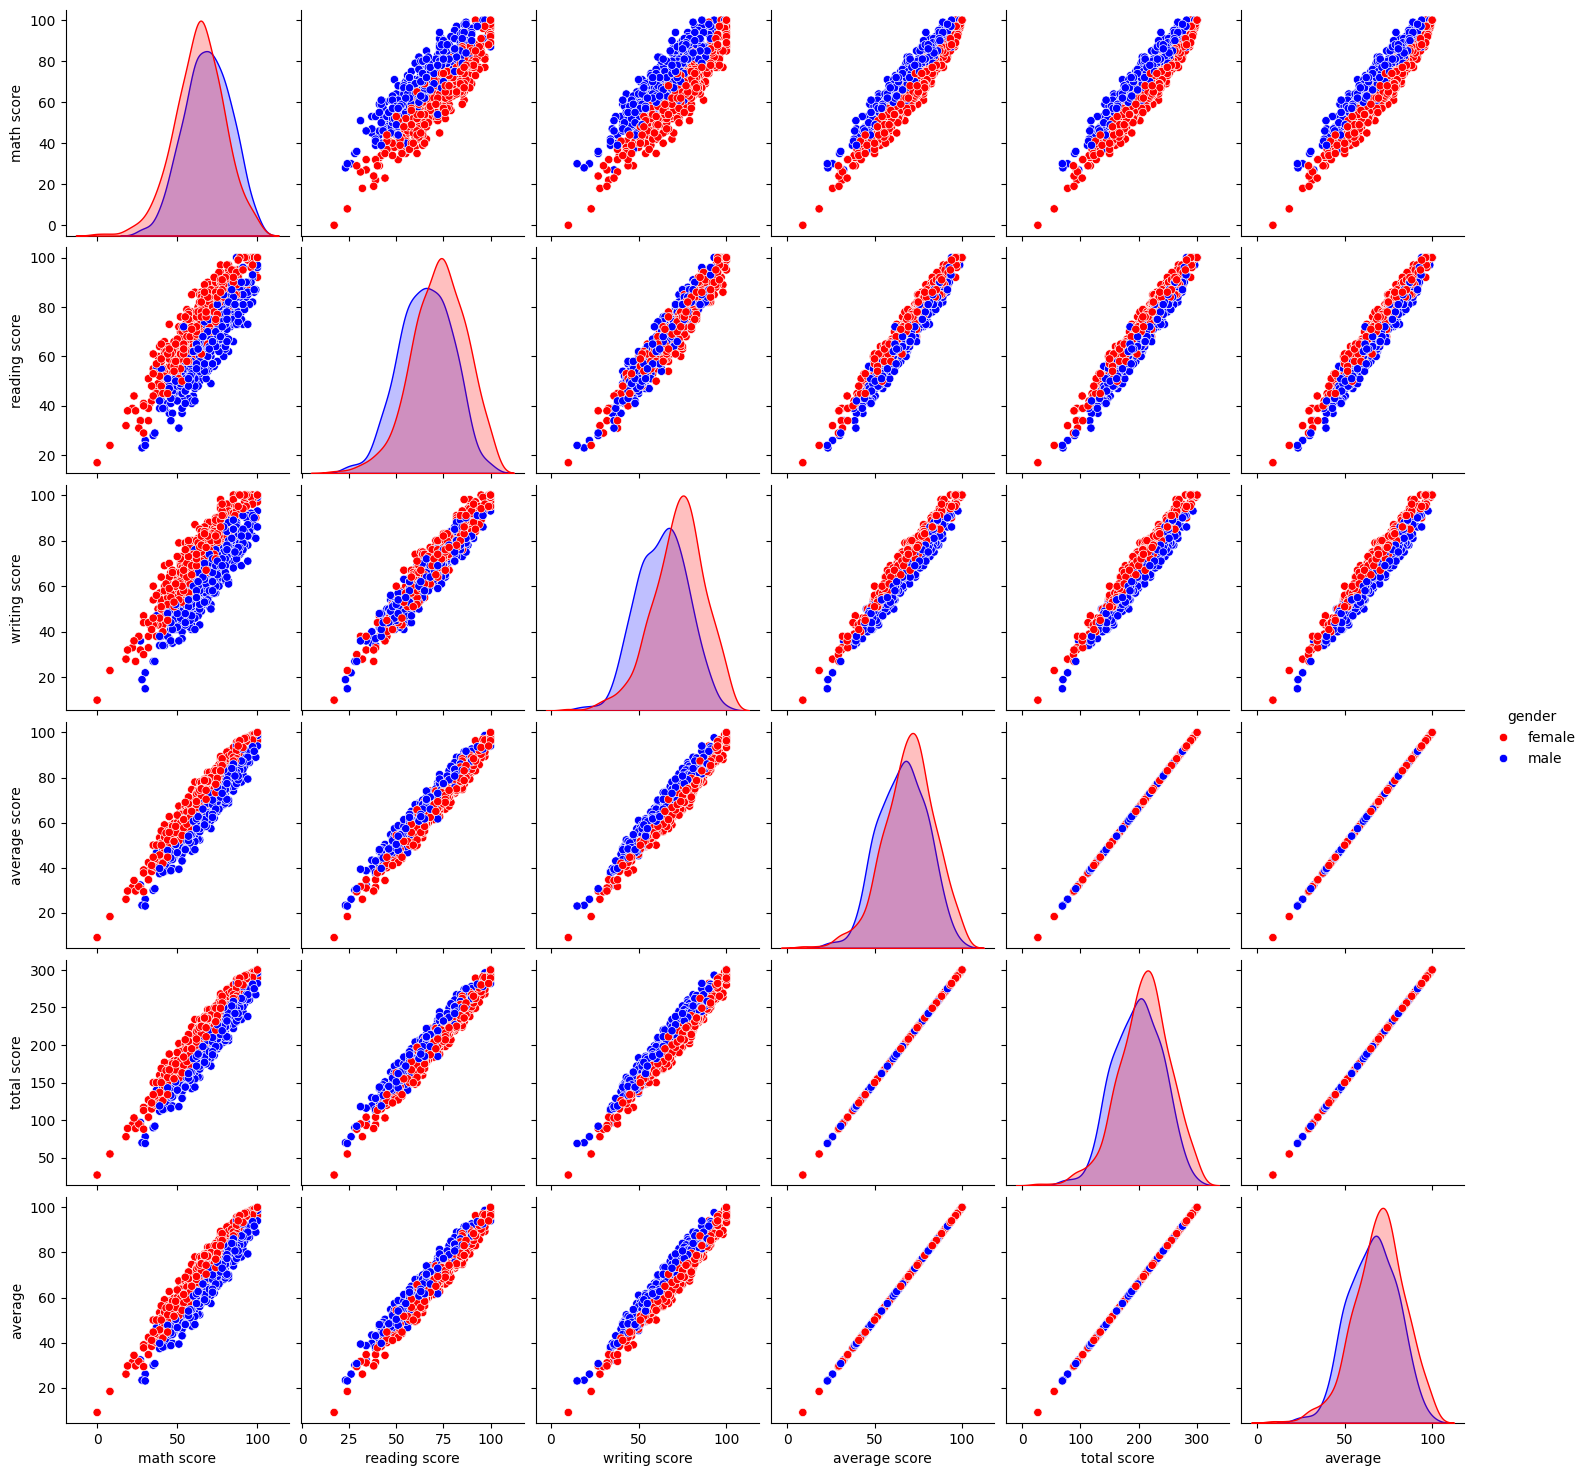

In [311]:
sns.pairplot(df, hue = 'gender', palette = ['red', 'blue'])
plt.show()

**General Observations:**

**Diagonal Histograms:**\
   **- These show the distribution of individual variables for males (blue) and females (red).**\
   **- Reading and writing scores have slightly higher density for females.**\
   **- Math scores show a relatively even distribution across genders, though males might score slightly higher.**

**Scatterplots:**\
   **- The off-diagonal scatterplots visualize pairwise relationships between variables.**\
   **- A strong positive correlation is evident between math, reading, and writing scores, as well as total and average scores.**\
   **- The scatter points for males and females mostly overlap, indicating similar performance patterns between genders.**

**Correlation:**\
   **- The relationships between variables like "total score" and "average score" are linear, as expected.**\
   **- High correlations are visible between all individual scores (math, reading, writing) and the composite scores (total, average).**

**Gender Insights:**\
**- Females (red points) appear to have higher scores in reading and writing on average.**\
**- Males (blue points) show a slight edge in math scores but the difference is less pronounced.**

#### **Identifying outliers**

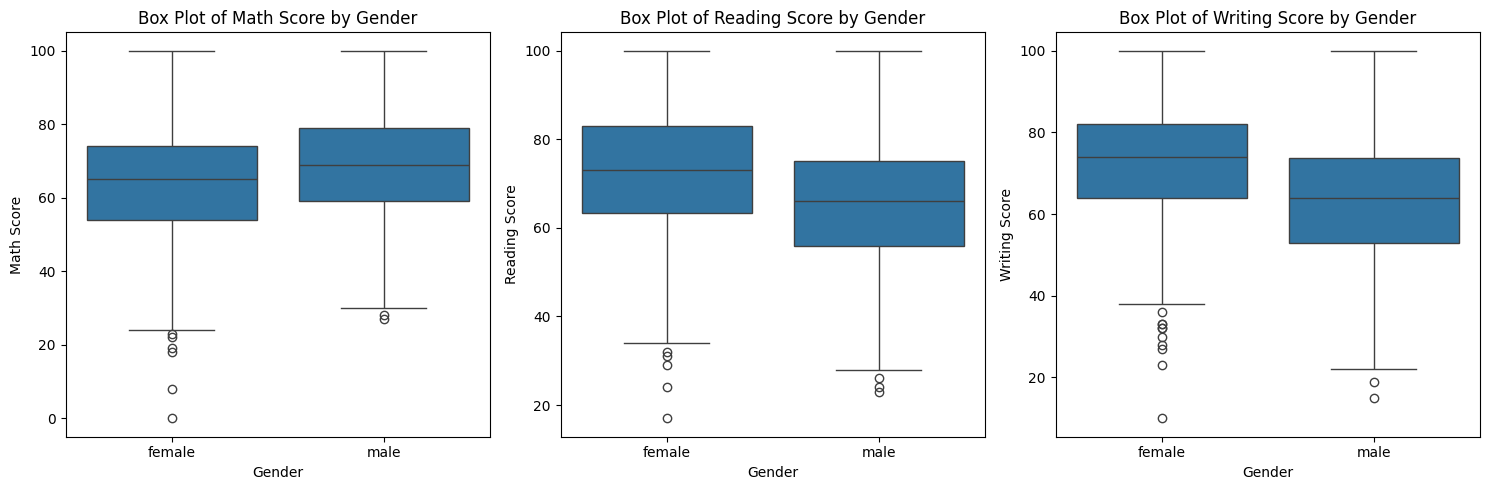

In [312]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#box plot for Math Score
sns.boxplot(x='gender', y='math score', data=df, ax=axes[0])
axes[0].set_title('Box Plot of Math Score by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Math Score')

#box plot for Reading Score
sns.boxplot(x='gender', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Reading Score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Reading Score')

#box plot for Writing Score
sns.boxplot(x='gender', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Box Plot of Writing Score by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Writing Score')

plt.tight_layout()
plt.show()

**General Insights from boxplot:**

**Females tend to outperform males in reading and writing, while math scores are more evenly distributed across genders.**

**Outliers in all categories suggest a few students underperform significantly relative to the majority.**

**Gender appears to influence the performance patterns, especially for reading and writing skills.**

#### **Correlation Matrix**

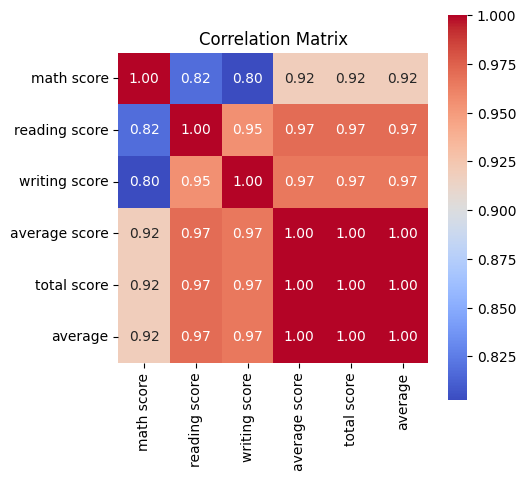

In [313]:

#select numerical data only (to avoid any possible error)
numerical_data = df.select_dtypes(include=['number'])


#create the matrix
plt.figure(figsize=(5, 5))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**Observations:**

**Strong Positive Correlation: All the variables have strong positive correlations with each other, indicating a strong linear relationship between them.**\
**Highest Correlation: The highest correlation is between "average score" and "total score" (1.00), followed by "reading score" and "writing score" (0.97), "average score" and "writing score" (0.97), and "average score" and "reading score" (0.97).**\
**Lowest Correlation: The lowest correlation is between "math score" and "writing score" (0.80).**

#### **Regression**

**First, drop from the dataset the variable we want to use as the prediction target.**

In [314]:
X = df.drop(columns='average score', axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


**Turn 'average score' into a target variable**

In [315]:
y = df['average score']
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average score, Length: 1000, dtype: float64

**Show unique values in each column**

In [316]:
for col in X.columns:
    if col not in ['reading score', 'writing score']:
        print('Categories in {0} are {1}'.format(col, df[col].unique()))

Categories in gender are ['female' 'male']
Categories in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are ['standard' 'free/reduced']
Categories in test preparation course are ['none' 'completed']
Categories in math score are [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in total score are [218 247 278 148 229 232 275 122 195 164 135 219 220 161 222 263  78 134
 173 198 210 151 215 225 178 211 205 207 217 189 193 120 266 241 238 253
 170 199 176 190 160 182 213 248 156 214 139 242 117 175  27 112 1

**Unique values ​​aid in the data preparation process, such as normalizing or standardizing variables, ensuring that the data is suitable for treatment in a regression model.**

**Transform the data, both numeric and categorical.**

In [317]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

col_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features), 
        ("StandardScalar", num_transformer, num_features)
    ]
)


In [318]:
X = col_transformer.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]])

In [319]:
X.shape


(1000, 22)

**Preparing data for modeling**

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (800, 22)
y_train shape: (800,)
X_test shape: (200, 22)
y_test shape: (200,)


**Standardize the data**

In [321]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

**Evaluate the performance of the model.**

In [322]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

**Modeling**

In [323]:
#import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

#build different model types to have better insights
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
}

#list performance scores
mae_list = []
rmse_list = []
r2_list = []

for key in models.keys():
    current_model = models[key]
    current_model.fit(X_train, y_train)
    
    #make predictions
    y_train_pred = current_model.predict(X_train)
    y_test_pred = current_model.predict(X_test)

    #evaluate model on train and test sets
    train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred) 

    print(f'{key} Performance for training set:')
    print(f'- Root Mean Squared Error: {round(train_rmse, 2)}')
    print(f'- Mean Absolute Error: {round(train_mae, 2)}')
    print(f'- R2 Score: {round(train_r2, 2)}')
    print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
    print(f'{key} Performance for test set:')
    print(f'- Root Mean Squared Error: {round(test_rmse, 2)}')
    print(f'- Mean Absolute Error: {round(test_mae, 2)}')
    print(f'- R2 Score: {round(test_r2, 2)}')

    mae_list.append(round(test_mae, 2)); 
    rmse_list.append(round(test_rmse, 2));
    r2_list.append(round(test_r2, 2))
    #create a visual separator
    print('='*55)

Linear Regression Performance for training set:
- Root Mean Squared Error: 0.0
- Mean Absolute Error: 0.0
- R2 Score: 1.0
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
Linear Regression Performance for test set:
- Root Mean Squared Error: 0.0
- Mean Absolute Error: 0.0
- R2 Score: 1.0
Lasso Performance for training set:
- Root Mean Squared Error: 1.01
- Mean Absolute Error: 0.81
- R2 Score: 0.99
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
Lasso Performance for test set:
- Root Mean Squared Error: 1.06
- Mean Absolute Error: 0.83
- R2 Score: 0.99
Ridge Performance for training set:
- Root Mean Squared Error: 0.0
- Mean Absolute Error: 0.0
- R2 Score: 1.0
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
Ridge Performance for test set:
- Root Mean Squared Error: 0.01
- Mean Absolute Error: 0.0
- R2 Score: 1.0
K-Neighbors Regressor Performance for training set:
- Root Mean Squared Error: 1.77
- Mean Absolute Error: 1.38
- R2 Score: 0.98
<~~~~~~~~

**List R^2 score for each built model**

In [324]:
pd.DataFrame(list(zip(list(models.keys()), r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.00
2,Ridge,1.00
4,Decision Tree Regressor,1.00
5,Random Forest Regressor,1.00
6,XGBRegressor,1.00
1,Lasso,0.99
3,K-Neighbors Regressor,0.98


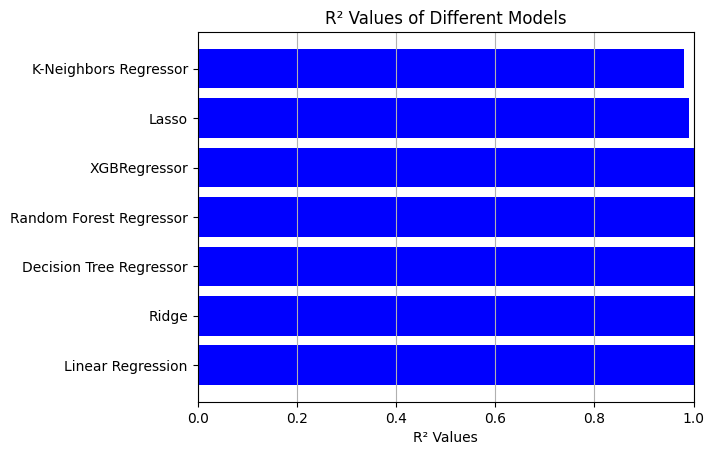

In [325]:
#create a DataFrame
df = pd.DataFrame(list(zip(list(models.keys()), r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

#extract sorted model names and R² scores
sorted_models = df['Model Name']
sorted_r2_scores = df['R2_Score']

#create a horizontal bar chart
plt.barh(sorted_models, sorted_r2_scores, color='blue')
plt.xlabel('R² Values')
plt.title('R² Values of Different Models')
plt.xlim(0, 1)  #set x-axis limits from 0 to 1
plt.grid(axis='x') 

plt.show()

In [326]:

#calculate MSE and R² for training and testing
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#results of the regression
print("Training Mean Squared Error (MSE):", train_mse)
print("Testing Mean Squared Error (MSE):", test_mse)
print("Training R-squared (R²):", train_r2)
print("Testing R-squared (R²):", test_r2)

#check for overfitting or underfitting
threshold_value = 0.20 * train_mse  #20% of the training error
if (test_mse - train_mse) > threshold_value:
    print("Model could be overfit.")
elif train_mse > threshold_value and test_mse > threshold_value:
    print("Model could be underfit.")
else:
    print("Model could be in good balance.")

Training Mean Squared Error (MSE): 0.00014954644209612248
Testing Mean Squared Error (MSE): 0.5507381022426892
Training R-squared (R²): 0.9999992502037436
Testing R-squared (R²): 0.9974308582219397
Model could be overfit.


##### **RMSE of each model**

In [327]:
pd.DataFrame(list(zip(list(models.keys()), rmse_list)), columns=[
            'Model Name', 'Root Mean Squared Error']).sort_values(by=["Root Mean Squared Error"], ascending=False)

,Model Name,Root Mean Squared Error
3,K-Neighbors Regressor,2.31
1,Lasso,1.06
5,Random Forest Regressor,0.84
6,XGBRegressor,0.74
4,Decision Tree Regressor,0.68
2,Ridge,0.01
0,Linear Regression,0.00


**A lower RMSE indicates a better predictive performance, and the results suggest that Linear Regression and Ridge are the most effective models for the given dataset.**

##### **MSE of each model**

In [328]:
pd.DataFrame(list(zip(list(models.keys()), mae_list)), columns=[
            'Model Name', 'Mean Absolute Error']).sort_values(by=["Mean Absolute Error"], ascending=False)

,Model Name,Mean Absolute Error
3,K-Neighbors Regressor,1.60
1,Lasso,0.83
6,XGBRegressor,0.18
5,Random Forest Regressor,0.11
4,Decision Tree Regressor,0.09
0,Linear Regression,0.00
2,Ridge,0.00


**A lower MAE indicates better predictive performance, and the results suggest that Linear Regression and Ridge are the most effective models for the given dataset.**\
**The K-Neighbors Regressor shows the highest error, indicating it may not be suitable for this particular dataset.**

##### **PLotting Actual vs Predicted Scores**

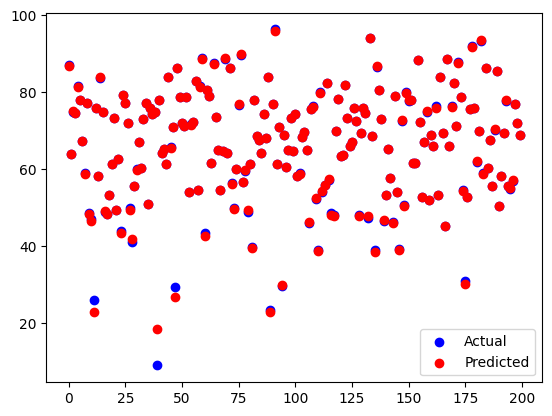

In [329]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test_pred)), y_test_pred, color='red', label='Predicted')
plt.legend()
plt.show()

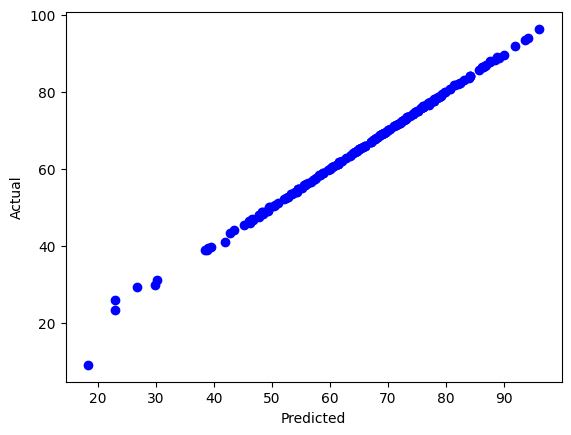

In [330]:
plt.scatter(y_test_pred, y_test, color='blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**The plot demonstrates a strong match between actual and predicted values, indicating a highly reliable predictive model.**

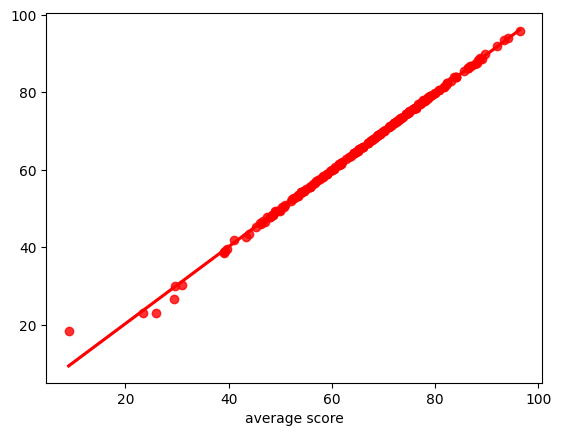

In [331]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color='red');

**The plot demonstrates a strong match between average scores and actual values, indicating that average scores are a reliable predictor of actual outcomes, with some exceptions represented by the outliers.**

In [332]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Difference': (y_test - y_test_pred)})
pred_df

,Actual,Predicted,Difference
521,87.000000,86.892723,0.107277
737,64.000000,64.023384,-0.023384
740,75.000000,75.087395,-0.087395
660,74.666667,74.587242,0.079425
411,81.666667,81.412231,0.254435
...,...,...,...
408,55.000000,55.165218,-0.165218
332,57.000000,57.133926,-0.133926
208,77.000000,76.945702,0.054298
613,72.000000,72.010849,-0.010849


**Overall, the table indicates that the model performs well, with predictions that are very close to actual values, as reflected in the small differences.**

#### **Residuals Calculation**

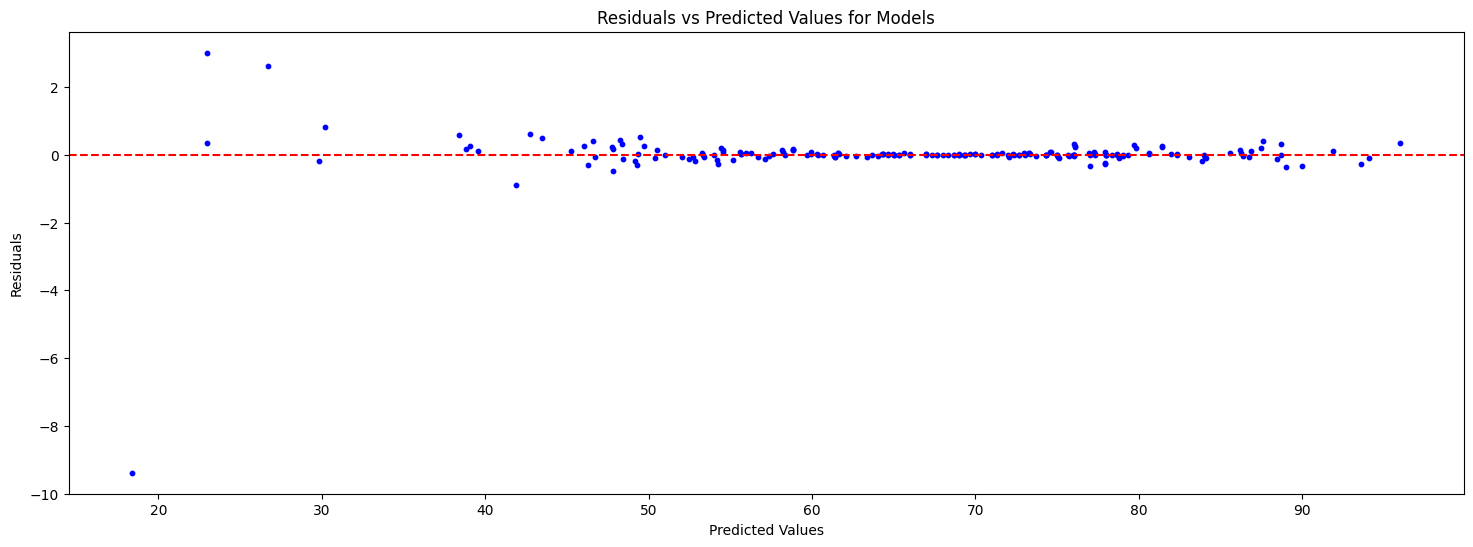

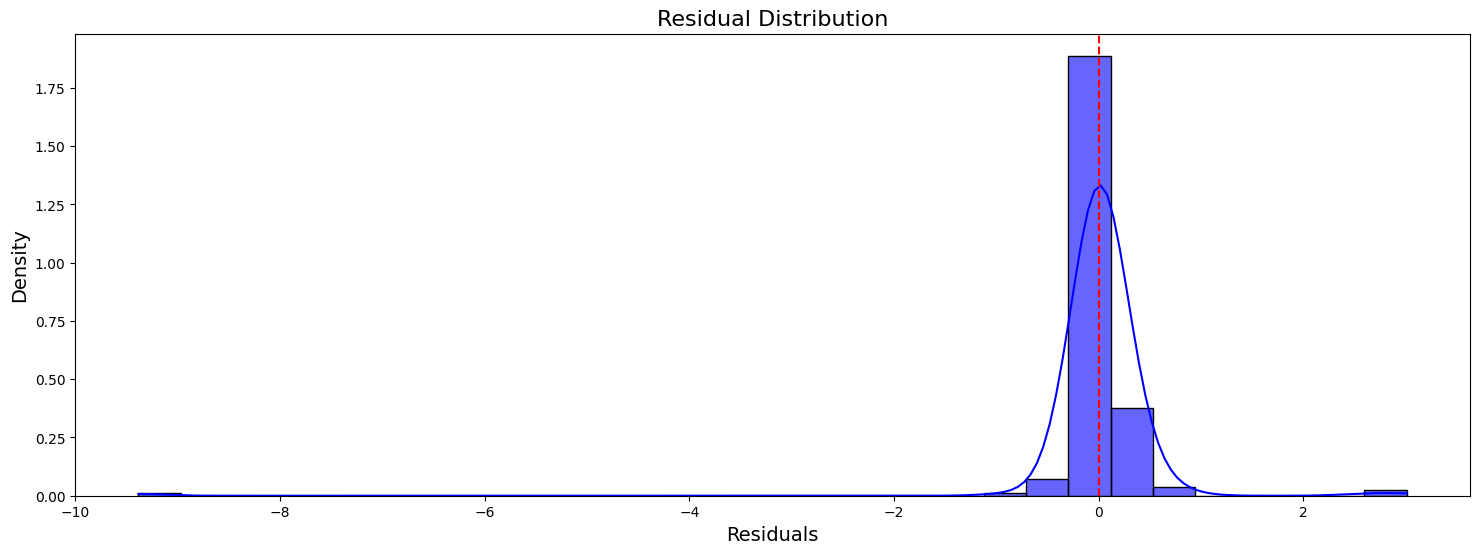

In [333]:
residuals = y_test - y_test_pred

#plot Residuals
plt.figure(figsize=(18, 6))    
plt.scatter(y_test_pred, residuals, color='blue', s=10)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residuals vs Predicted Values for Models')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#calculate residuals as difference of actual - predicted values
residuals = y_test - y_test_pred 

plt.figure(figsize=(18, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', stat='density', alpha=0.6)

#add a vertical line at zero
plt.axvline(0, color='red', linestyle='--')

plt.title('Residual Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

**The 'residuals vs. predicted values' plot shows that the model performs well for higher predicted values, as residuals cluster closely around zero.**\
**However, for lower predicted values (20–40), there are larger deviations, suggesting the model struggles in this range. This could indicate non-linearity, missing features, or outliers in the data.**

**The residuals are centered around zero, indicating good overall model performance.**\
**However, there are outliers in the left tail and slight skewness, suggesting the model may struggle with some data points.**\
**Further investigation into these outliers and potential model improvements may be needed: Shapiro-Wilk test!**

In [334]:
from scipy import stats

#perform the Shapiro-Wilk test on the residuals
shapiro_test = stats.shapiro(residuals)

#print the test statistic and p-value
print('Shapiro-Wilk Test Statistic:', shapiro_test.statistic)
print('p-value:', shapiro_test.pvalue)

#interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('The residuals are normally distributed (fail to reject H0)')
else:
    print('The residuals are not normally distributed (reject H0)')

Shapiro-Wilk Test Statistic: 0.23907807385578805
p-value: 6.6069726049917225e-28
The residuals are not normally distributed (reject H0)


**The results of Shapiro-Wilk test indicate that the residuals do not follow a normal distribution, as the p-value (6.6e-28) is much smaller than the typical threshold of 0.05. This suggests that the model's errors (residuals) are not behaving as expected under the assumption of normality.**

#### **Cross-validation scores**

In [335]:

from sklearn.model_selection import cross_val_score

#iterate over the models and perform cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    #convert negative MSE to positive RMSE
    rmse_scores = np.sqrt(-cv_scores)
    
    print(f"{model_name} - Cross-Validation RMSE Scores: {rmse_scores}")
    print(f"{model_name} - Mean RMSE: {np.mean(rmse_scores)}")
    print(f"{model_name} - Standard Deviation of RMSE: {np.std(rmse_scores)}")
    print()  #print a newline for better readability

Linear Regression - Cross-Validation RMSE Scores: [9.33644097e-15 1.70705951e-14 9.33221538e-15 1.16889139e-14
 1.17494961e-14]
Linear Regression - Mean RMSE: 1.1835532302282401e-14
Linear Regression - Standard Deviation of RMSE: 2.826546838744005e-15

Lasso - Cross-Validation RMSE Scores: [1.16863328 0.96636995 0.93893937 0.96789641 1.01000322]
Lasso - Mean RMSE: 1.0103684471509982
Lasso - Standard Deviation of RMSE: 0.08232830009373779

Ridge - Cross-Validation RMSE Scores: [0.00615975 0.00538169 0.00610386 0.00578802 0.00609167]
Ridge - Mean RMSE: 0.005904998826595901
Ridge - Standard Deviation of RMSE: 0.00029217528083866974

K-Neighbors Regressor - Cross-Validation RMSE Scores: [2.2862694  2.00592179 2.01330298 1.94927337 2.32966974]
K-Neighbors Regressor - Mean RMSE: 2.1168874564438815
K-Neighbors Regressor - Standard Deviation of RMSE: 0.15817973980219066

Decision Tree Regressor - Cross-Validation RMSE Scores: [0.32596012 0.20916501 0.31732388 0.16873714 0.63410041]
Decision Tr

**Results interpretation:**

**1. Linear Regression:**
**Cross-Validation RMSE Scores: The RMSE scores are extremely small (on the order of 10^(-15)), indicating that the model is performing exceptionally well on the training data. This suggests that the model is likely overfitting, especially if the dataset is not very large or complex.**

**Mean RMSE: 1.18*10^(-14) is effectively close to zero, indicating almost perfect predictions.**

**Standard Deviation of RMSE: The very low standard deviation 2.83*10^(-15) suggests that the model's performance is very consistent across the different folds of cross-validation.**

**2. Lasso:**

**Cross-Validation RMSE Scores: The RMSE scores range from approximately 0.94 to 1.17, which is significantly higher than those of Linear Regression.**

**Mean RMSE: 1.01 indicates that the model has a reasonable level of error in its predictions.**

**Standard Deviation of RMSE: The standard deviation 0.08 indicates some variability in the model's performance across different folds, but it is not excessively high.**

**3. Ridge:**

**Cross-Validation RMSE Scores: The RMSE scores are quite low, ranging from (0.0054) to 0.0062.**

**Mean RMSE: 0.0059 indicates that the Ridge model is performing well, with low error.**

**Standard Deviation of RMSE: The very low standard deviation 0.00029 suggests that the model's performance is stable across different folds.**

**4. K-Neighbors Regressor:**

**Cross-Validation RMSE Scores: The RMSE scores range from approximately 1.95 to 2.33.**

**Mean RMSE: 2.12 indicates a moderate level of error in predictions.**

**Standard Deviation of RMSE: The standard deviation 0.16 indicates some variability in performance, but it is not excessive.**

**5. Decision Tree Regressor:**

**Cross-Validation RMSE Scores: The RMSE scores range from 0.18 to 0.46.**

**Mean RMSE: 0.31 indicates a moderate level of error.**

**Standard Deviation of RMSE: The standard deviation 0.12 suggests that the model's performance varies more than some of the other models.**

**6. Random Forest Regressor:**

**Cross-Validation RMSE Scores: The RMSE scores range from 0.11 to 0.63.**

**Mean RMSE: 0.29 indicates that the Random Forest model performs well, with relatively low error.**

**Standard Deviation of RMSE: The standard deviation 0.19 indicates some variability in performance, which is not uncommon for ensemble methods.**

**7. XGBRegressor:**

**Cross-Validation RMSE Scores: The RMSE scores range from 0.30 to 0.67.**

**Mean RMSE: 0.47 indicates a moderate level of error.**

**Standard Deviation of RMSE: The standard deviation 0.15 suggests some variability in performance.**

**Overall Interpretation:**

**Best Performing Model: The Ridge regression model has the lowest mean RMSE, indicating it has the best performance among the models tested.**

**Overfitting Concern: The Linear Regression model shows signs of overfitting, as indicated by its extremely low RMSE scores, which may not generalize well to unseen data.**

**Model Variability: The standard deviations of RMSE for most models are relatively low, indicating consistent performance across different folds of cross-validation, except for the K-Neighbors and Decision Tree models, which show more variability.**

**Model Selection: Depending on your specific use case, you may choose the Ridge regression model for its low error, or consider other models based on interpretability, complexity, or other factors relevant to your application.**

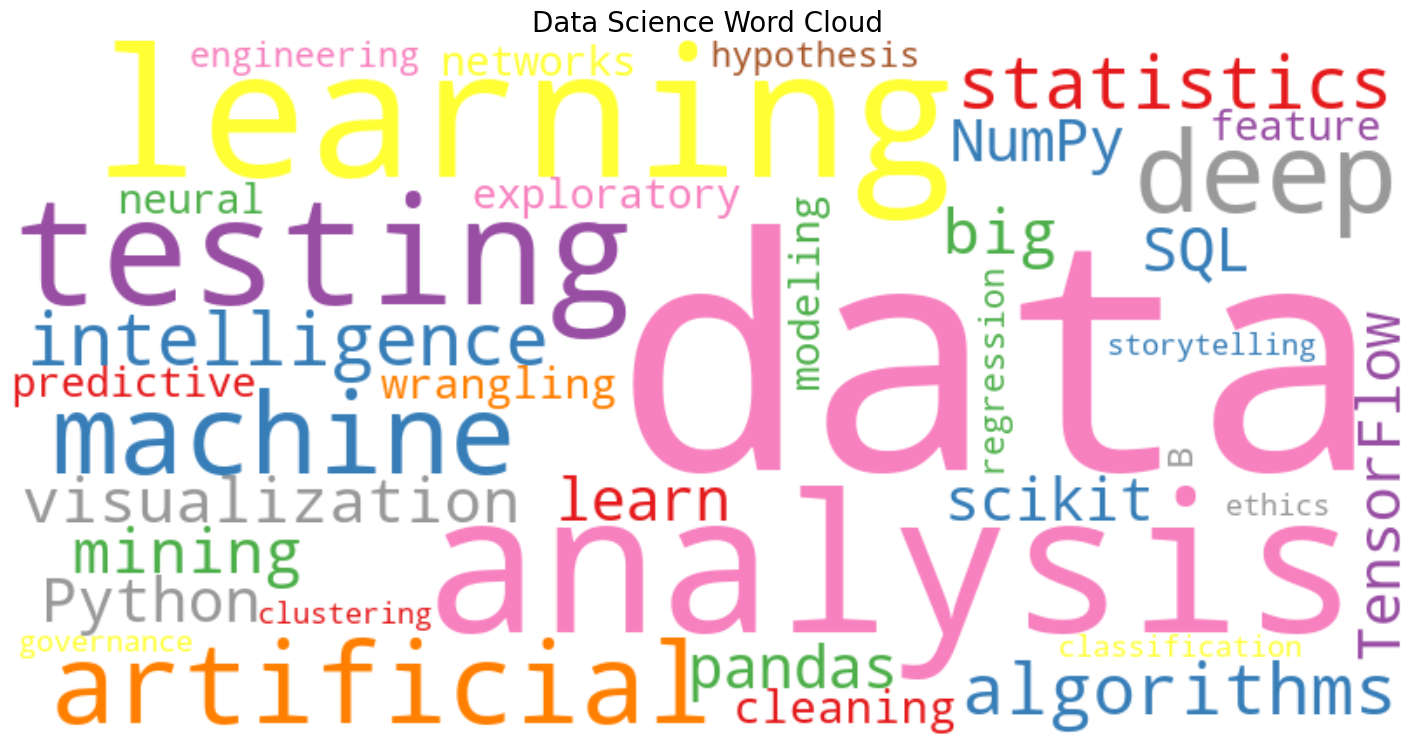

In [336]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words = """ data analysis machine learning deep learning artificial intelligence
statistics algorithms data visualization data mining big data
Python R SQL pandas NumPy TensorFlow scikit-learn
data cleaning data wrangling exploratory data analysis
predictive modeling neural networks feature engineering
A/B testing hypothesis testing regression classification clustering
data storytelling data ethics data governance """
wordcloud = WordCloud(width=800, height=400, colormap='Set1', background_color='white').generate(words)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Data Science Word Cloud', fontsize=20)
plt.show()